## Table Of Contents
>• Introduction.<br>
• Data Introduction.<br>
• Data Preparation (Import libraries, data cleaning & data wrangling).<br>
• Exploratory data analysis.<br>
• Feature selection.<br>
• Modelling.<br>



# Introduction
***
>This project is a final project made as one of the requirements to pass dibimbing data science bootcamp. The dataset I used is telco customer churn, a dataset that is popular and commonly used for practice. I chose this dataset because it has a lot of columns and it seems to represent a 'real-life' dataset in a real telco company. The problem faced by the company is customer churn. When customer churn, the company suffered a loss. The solution is giving prospect and promos to potential churned customer, but this action also cost the company some money, so it is important to accurately target the churned customer. Based on this problem, I set 2 main goals: <br>
1.Look for useful informations, insights and pattern as many as possible by asking question & doing exploratory data analysis.<br>
2.Create a ML model that served the best fit to company goal's which is reducing losses.<br>    

# Data Introduction
***
>This dataset contain informations about customers that churn and not churned in a telco company. Below is the column informations:<Br>
1.customerID = customer unique ID.<Br>
2.gender = customer gender (M/F).<br>
3.SeniorCitizen = old / young customer.<br>
4.Partner = either a customer has partners or not.<br>
5.Dependents = either a customer has dependents or not.<br>
6.tenure = how long the customer subscribed (in month).<br>
7.MultipleLines = either a customer using multiple lines or not (phone lines).<br>
8.InternetService = either a customer using InternetService lines or not.<br>
9.OnlineSecurity = either a customer has OnlineSecurity or not.<br>
10.OnlineBackup = either a customer has OnlineBackup or not.<br>
11.DeviceProtection = either a customer has DeviceProtection or not.<br>
12.TechSupport = either a customer has TechSupport or not.<br>
13.StreamingTV = either a customer has StreamingTV or not.<br>
14.StreamingMovies = either a customer has StreamingMovie or not.<br>
15.Contract = types of contract.<Br>
16.PaperlessBilling = either a customer has PaperlessBilling or not.<br>
17.PaymentMethod = types of the payment method.<Br>
18.MonthlyCharges = how much charges per month.<br>
19.TotalCharges = total charges of all time.<br>
20.Churn = either a customer churn or not.<br>
21.Hobby = customer hobby.<br><br>
Dataset assumption : This telco company has been around for 7 years.

## Data Preparation (Import libraries, data cleaning & data wrangling)
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy.stats import gaussian_kde
sns.set()

In [2]:
github = 'https://raw.githubusercontent.com/vertikalwil/Data-Analyst/main/telco.csv'

In [3]:
df = pd.read_csv('github')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Hobby
0,7590-VHVEG,Female,0,Yes,No,135,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Swimming
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Running
2,3668-QPYBK,Male,0,No,No,140,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,7560,Yes,Hiking
3,7795-CFOCW,Male,0,No,No,136,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.45,1840.75,No,Swimming
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Running


In [4]:
print(type(df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  6627 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          6798 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
missingkolom = ['DeviceProtection','Contract','TotalCharges','Hobby']
for x in missingkolom:
    print(f'Missing value of column {x} (%) : {round(df[x].isna().sum()/len(df) * 100,2)}')

Missing value of column DeviceProtection (%) : 5.91
Missing value of column Contract (%) : 3.48
Missing value of column TotalCharges (%) : 31.01
Missing value of column Hobby (%) : 40.35


In [6]:
#impute missing values with univariate imputation by value proportion
df['DeviceProtection'] = df['DeviceProtection'].fillna(pd.Series(np.random.choice(['No','Yes','No internet service'], p = list(df['DeviceProtection'].value_counts(normalize=True)), size=len(df))))
df['Contract'] = df['Contract'].fillna(pd.Series(np.random.choice(['Month-to-month','Two year','One year'], p = list(df['Contract'].value_counts(normalize=True)), size=len(df))))

> Alasan melakukan imputation:<br>
1.Missing value sedikit.<br>
2.Kolom tidak memiliki relasi atau hubungan dikolom apapun sehingga multivariate imputasi tidak dimungkinkan.<br>
3.Menggunakan proporsi nilai lebih tepat dari pada sekedar menggunakan nilai 'mode'.

In [7]:
df.drop(columns=['Hobby'],inplace=True)

> Alasan melakukan delete kolom:<br>
1.Missing value terlalu banyak.<br>
2.Secara konteks, kolom tersebut tidak terlalu berguna dalam memberikan informasi.<br>
3.Tidak memiliki justifikasi yang kuat (tidak bisa diimpute secara multivariate).<br>

In [8]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'])

> Alasan melakukan imputation:<br>
1.Walaupun missing value banyak namun imputasi tetap bisa dilakukan karena memiliki justifikasi yang kuat yaitu.<br>
2.Kolom TotalCharges nilainya kurang lebih merupakan dari nilai tenure * MonthlyCharges.<br>
3.Menggunakan proporsi nilai lebih tepat dari pada sekedar menggunakan nilai 'mode'.

In [9]:
#there's a space in the total charges column.
for x in df.TotalCharges:
    try:
        float(x)
    except:
        print(f'Unable to convert to float with this value : {x}')

Unable to convert to float with this value :  
Unable to convert to float with this value :  
Unable to convert to float with this value :  
Unable to convert to float with this value :  
Unable to convert to float with this value :  
Unable to convert to float with this value :  
Unable to convert to float with this value :  
Unable to convert to float with this value :  
Unable to convert to float with this value :  
Unable to convert to float with this value :  
Unable to convert to float with this value :  
Unable to convert to float with this value :  


In [10]:
df[df.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,Yes,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1334,1768-ZAIFU,Female,1,No,No,0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.20,,Yes
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


>Berdasarkan data diatas, ketika TotalChargesnya kosong maka nilai tenure-nya juga 0. Ini menandakan bahwa rows tersebut merupakan customer yang baru bergabung (belum ada charges). Jumlahnya hanya 12 baris, let's drop it.

In [11]:
df = df.drop(df.index[df.TotalCharges == ' ']).reset_index(drop=True)

In [12]:
#check for duplicate data, if True then there's no duplicate.
df.customerID.nunique() == len(df) 

True

In [13]:
#feature engineering
df['Services'] = df[['PhoneService','InternetService']].apply(lambda x: 'Both' if list(x).count('No') == 0 else 'Internet Only' if x[0] == 'No' else 'Phone Only', axis=1)
df['TotalBenefits'] = df[['OnlineSecurity','DeviceProtection','OnlineBackup','TechSupport','StreamingTV','StreamingMovies']].apply(lambda x: list(x).count('Yes'), axis=1)

>Penjelasan fitur baru: <Br>
1.Services = services/produk yang digunakan yaitu 'Phone Only', 'Internet Only' atau 'Both.<br>
2.TotalBenefits = jumlah benefit yang digunakan oleh customer. Benefit yang dimaksud adalah 'OnlineSecurity', 'DeviceProtection', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies'.

In [14]:
df['SeniorCitizen'] = df.SeniorCitizen.apply(lambda x: 'Yes' if x == 1 else 'No')

>Saya mengubah nilai SeniorCitizen dari numerik menjadi string agar lebih aesthethic saat melakukan EDA nantinya.

In [15]:
#drop useless column
df.drop(columns=['customerID'], inplace=True)

In [16]:
df.tenure = df.tenure.astype('int64')
df.MonthlyCharges = df.MonthlyCharges.astype('float64')
df.TotalCharges = df.TotalCharges.astype('float64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7031 entries, 0 to 7030
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7031 non-null   object 
 1   SeniorCitizen     7031 non-null   object 
 2   Partner           7031 non-null   object 
 3   Dependents        7031 non-null   object 
 4   tenure            7031 non-null   int64  
 5   PhoneService      7031 non-null   object 
 6   MultipleLines     7031 non-null   object 
 7   InternetService   7031 non-null   object 
 8   OnlineSecurity    7031 non-null   object 
 9   OnlineBackup      7031 non-null   object 
 10  DeviceProtection  7031 non-null   object 
 11  TechSupport       7031 non-null   object 
 12  StreamingTV       7031 non-null   object 
 13  StreamingMovies   7031 non-null   object 
 14  Contract          7031 non-null   object 
 15  PaperlessBilling  7031 non-null   object 
 16  PaymentMethod     7031 non-null   object 


> Columns non-null entry sudah sesuai data entry, yang artinya tidak ada missing value. Data type juga sudah sesuai.

In [18]:
df['TotalChargesDiff'] = df[['tenure','MonthlyCharges','TotalCharges']].apply(lambda x: round(abs(1 - (x[0] * x[1] / x[2])) * 100,3),axis=1)

In [19]:
df['TotalChargesDiff'].sort_values(ascending=False).head(15)

0       13400.000
5        1357.404
18        788.048
19        330.214
3         213.633
128        73.511
47         72.615
4631       64.286
5802       63.380
20         58.263
6247       57.534
80         57.330
299        55.285
121        51.534
4195       44.990
Name: TotalChargesDiff, dtype: float64

In [20]:
df = df[df.TotalChargesDiff < 40].reset_index(drop=True)
df.drop(columns=['TotalChargesDiff'], inplace=True)

> Disini saya membuat 1 kolom yaitu dengan tujuan untuk membandingkan seberapa jauh nilai totalcharges yang asli dan totalcharges dari perkalian tenure dan monthlycharges. Untuk data yang berbeda terlalu jauh (diatas 40%) maka akan didrop.

In [21]:
def numericategoric(df):
    num = len(df._get_numeric_data().columns)
    cat = len(df.columns) - num
    print("TotalNumericalData = " + str(num))
    print("TotalCategoricalData = " + str(cat))
    print("Numerical = " + str(list(df._get_numeric_data().columns )))
    print("Categorical = " + str(list(df.drop(df._get_numeric_data().columns, axis=1).columns)))

In [22]:
numericategoric(df)

TotalNumericalData = 4
TotalCategoricalData = 18
Numerical = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalBenefits']
Categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'Services']


>Mayoritas kolom adalah categorical.

In [23]:
#Membagi kolom2 numerikal dan categorical 
dfnum = df._get_numeric_data()
dfcat = df.drop(columns = dfnum.columns)

## Exploratory data analysis.
***
### Descriptive Statistics

In [24]:
dfnum.describe()

,tenure,MonthlyCharges,TotalCharges,TotalBenefits
count,7012.000000,7012.000000,7012.000000,7012.000000
mean,32.506560,64.732760,2286.410207,2.042926
std,24.564234,30.109753,2265.759401,1.835251
min,1.000000,12.000000,13.500000,0.000000
25%,9.000000,35.450000,402.437500,0.000000
50%,29.000000,70.300000,1397.250000,2.000000
75%,56.000000,89.850000,3784.125000,3.000000
max,140.000000,118.750000,8684.800000,6.000000


>1.Semua kolom sepertinya sudah cukup simetris (nilai medan dan median mendekati) kecuali untuk kolom TotalCharges (positive skew).<br>
2.Perhitungan kolom TotalCharges adalah kurang lebih tenure * MonthlyCharges.<br>
3.Nilai min max setiap kolom juga wajar, tidak ada nilai negatif. Untuk TotalBenefits wajar ada nilai 0 karena ada customers yang tidak mengambil benefits sama sekali.<br>

In [25]:
dfcat.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Services
count,7012,7012,7012,7012,7012,7012,7012,7012,7012,7012,7012,7012,7012,7012,7012,7012,7012,7012
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,3
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,Both
freq,3542,5874,3624,4920,6336,3372,3087,3486,3075,3074,3459,2798,2769,3854,4155,2354,5155,4821


>1.Pada setiap kolom tidak ada nilai unique values yang terlalu banyak (paling banyak hanya 4 di PaymentMethod).<br>
2.Gender Male adalah yang paling banyak tetapi jumlahnya hanya sekitar 3500-an dari 7000 entries, yang artinya hanya beda tipis dengan gender Female.<br>
3.Mayoritas SeniorCitizen, Partner dan Dependents adalah No yang artinya kebanyakan orang muda yang single dan tak ada tanggungan.<br>
4.Mayoritas juga memakai PhoneService tetapi tanpa MultipleLines.<br>
5.InternetService terbanyak adalah Fiber optic.<br>
6.Untuk benefits (dari OnlineSecurity-StreamingMovies) mayoritas adalah No atau mayoritas tidak menggunakan benefits yang ada.<br>
7.Contract terbanyak adalah Month-to-month, mayoritas customer tidak siap berkomitment panjang menggunakan produk telco ini.<br>
8.PaperlessBilling kebanyakan Yes dan favorit paymentmethod adalah Electronic check.<br>
9.Mayoritas customer pada dataset ini adalah kebanyakan yang tidak churned.<br>
10.Untuk services terbanyak ada pada 'Both' sebanyak 4832, artinya mayoritas customers menggunakan internet service dan phone service sekaligus.


In [26]:
for col in dfcat.columns:
  print(f"Value counts for column {col}:")
  print(df[col].value_counts())
  print("---"*10)
  print("\n")

Value counts for column gender:
Male      3542
Female    3470
Name: gender, dtype: int64
------------------------------


Value counts for column SeniorCitizen:
No     5874
Yes    1138
Name: SeniorCitizen, dtype: int64
------------------------------


Value counts for column Partner:
No     3624
Yes    3388
Name: Partner, dtype: int64
------------------------------


Value counts for column Dependents:
No     4920
Yes    2092
Name: Dependents, dtype: int64
------------------------------


Value counts for column PhoneService:
Yes    6336
No      676
Name: PhoneService, dtype: int64
------------------------------


Value counts for column MultipleLines:
No                  3372
Yes                 2964
No phone service     676
Name: MultipleLines, dtype: int64
------------------------------


Value counts for column InternetService:
Fiber optic    3087
DSL            2410
No             1515
Name: InternetService, dtype: int64
------------------------------


Value counts for column Onl

### Univariate Analysis

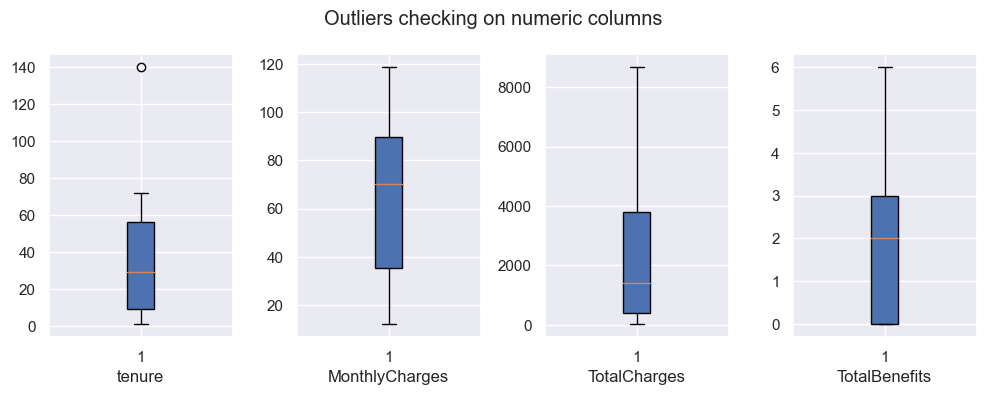

In [27]:
fig, axarr = plt.subplots(1,4, figsize=(10, 4))
for x in dfnum.columns:
    axarr[dfnum.columns.get_loc(x)].boxplot(df[x],patch_artist=True)
    axarr[dfnum.columns.get_loc(x)].set_xlabel(x)
plt.suptitle("Outliers checking on numeric columns")
fig.tight_layout(pad=1)
plt.show()

>Terdapat 1 outliers yang tidak wajar, row tersebut akan didrop.

In [28]:
df[df.tenure > 125]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Services,TotalBenefits
1,Male,No,No,No,140,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,7560.0,Yes,Both,2


In [29]:
df.drop(index=1,inplace=True)

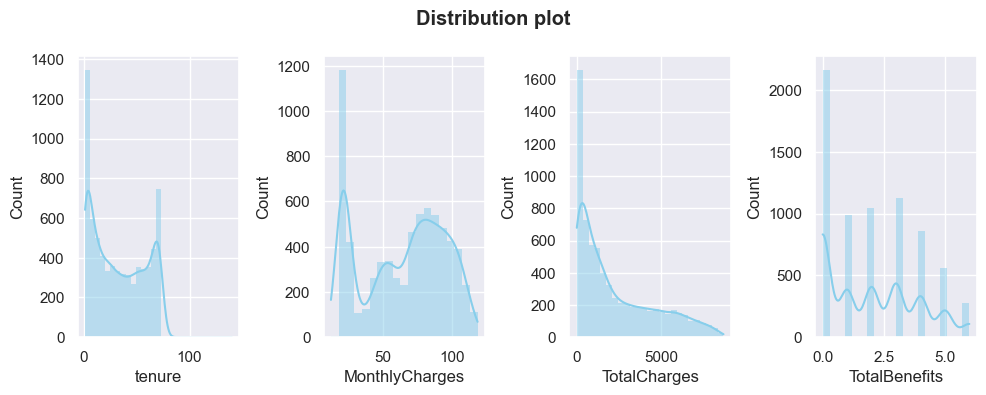

In [30]:
fig, axarr = plt.subplots(1,4, figsize=(10, 4))
for x in dfnum.columns:
    sns.histplot(dfnum[x],color='skyblue', kde=True, edgecolor='none', ax=axarr[dfnum.columns.get_loc(x)])
plt.suptitle("Distribution plot", weight='bold')
fig.tight_layout(pad=1)

>1.Distribusi kolom tenure berbentuk U-shaped, mayoritas customers adalah customer yang sangat baru atau customer yang sangat lama.<br>
2.Untuk MonthlyCharges, kebanyakan customers terdapat pada rentan < 30 USD lalu frekuensinya drop pada range 30 - 40 USD dan naik kembali sampai tertinggi ada di sekitar 80 USD. Sepertinya produk dengan range harga 30 - 40 USD kurang diminati atau terkesan tanggung.<br>
3.Pada TotalCharges, semakin tinggi TotalCharges maka frekuensinya semakin sedikit (Positive Skew).<br>
4.Untuk TotalBenefits, Benefit 0 adalah yang tertinggi. 

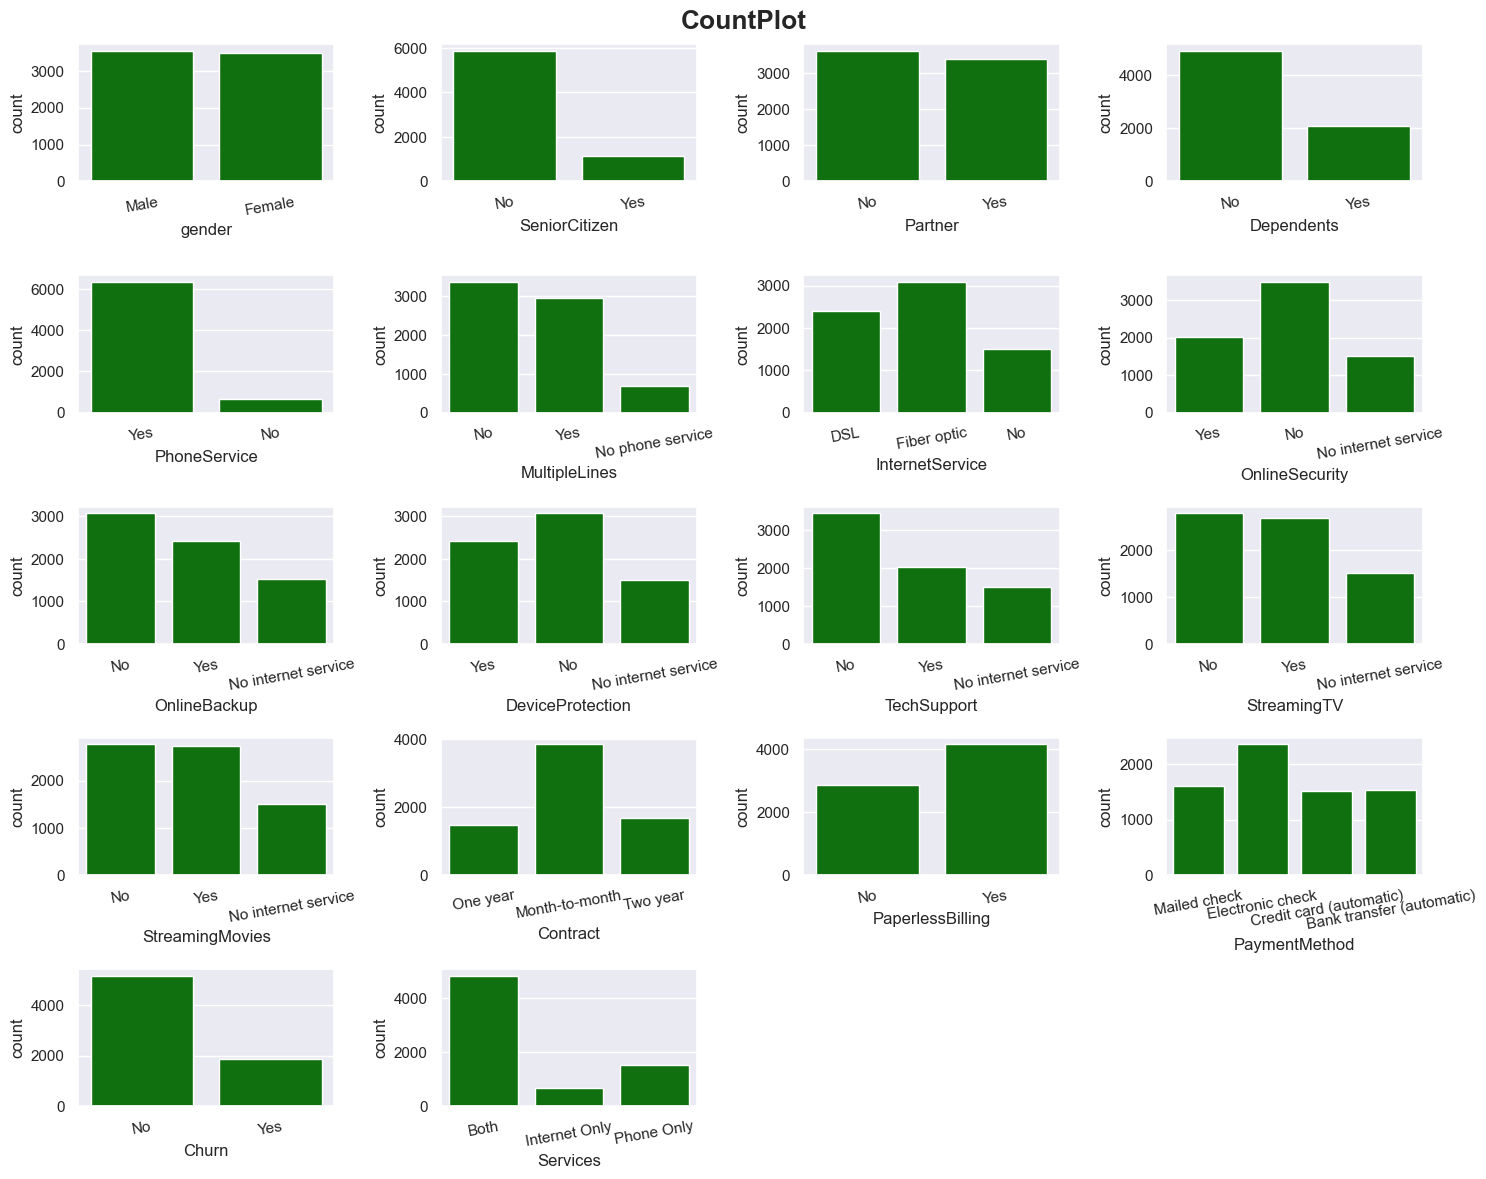

In [31]:
plt.figure(figsize=(15,12))

features = dfcat.columns
for i in np.arange(1, len(features)+1):
    plt.subplot(5, len(features)//3 - 2, i)
    sns.countplot(x=df[features[i-1]], color='green')
    plt.xticks(rotation=10)
    plt.xlabel(features[i-1])
plt.suptitle('CountPlot', size=19, weight='bold')
plt.tight_layout(pad = 1)

>1.Untuk paymentmethod, terlihat electronic check adalah terfavorit namun untuk metode lain terlihat cukup equal satu sama lain.<br>
2.Untuk phone service, terlihat bahwa mayoritas adalah pengguna phone service. Jumlahnya sangat berbeda jauh dengan yang tidak (imbalanced) sedangkan untuk multiple line nya mayoritas memilih 'No'.<Br>
3.Untuk SeniorCitizen juga sama, perbandingan antara 'No' dan 'Yes' cukup jauh yaitu mayoritas ada pada 'No'.<Br>
4.Untuk services 'Both' juga mendominasi cukup jauh dari Internet Only dan Phone Only.<br>
5.Untuk contract, 'Month-to-month' contract yang paling mendominasi disusul oleh 'Two year' dan 'One year' tetapi gap antara 'Two year' dan 'One year' tidak berbeda begitu jauh.<br>
6.Mayoritas ternyata tidak memiliki partner, namun gap nya terlihat tipis antara 'Yes' dan 'No'.<br>
7.Mayoritas tidak memiliki dependent.<br>
8.Untuk benefit (OnlineSecurity sampai StreamingMovies) terlihat bahwa mayoritas customer lebih memilih 'No'.<br>
9.Lebih banyak customer memilih paperlessbilling dari yang tidak.<br>
10.Mayoritas customer pada dataset ini adalah yang tidak churn.

### Multivariate Analysis

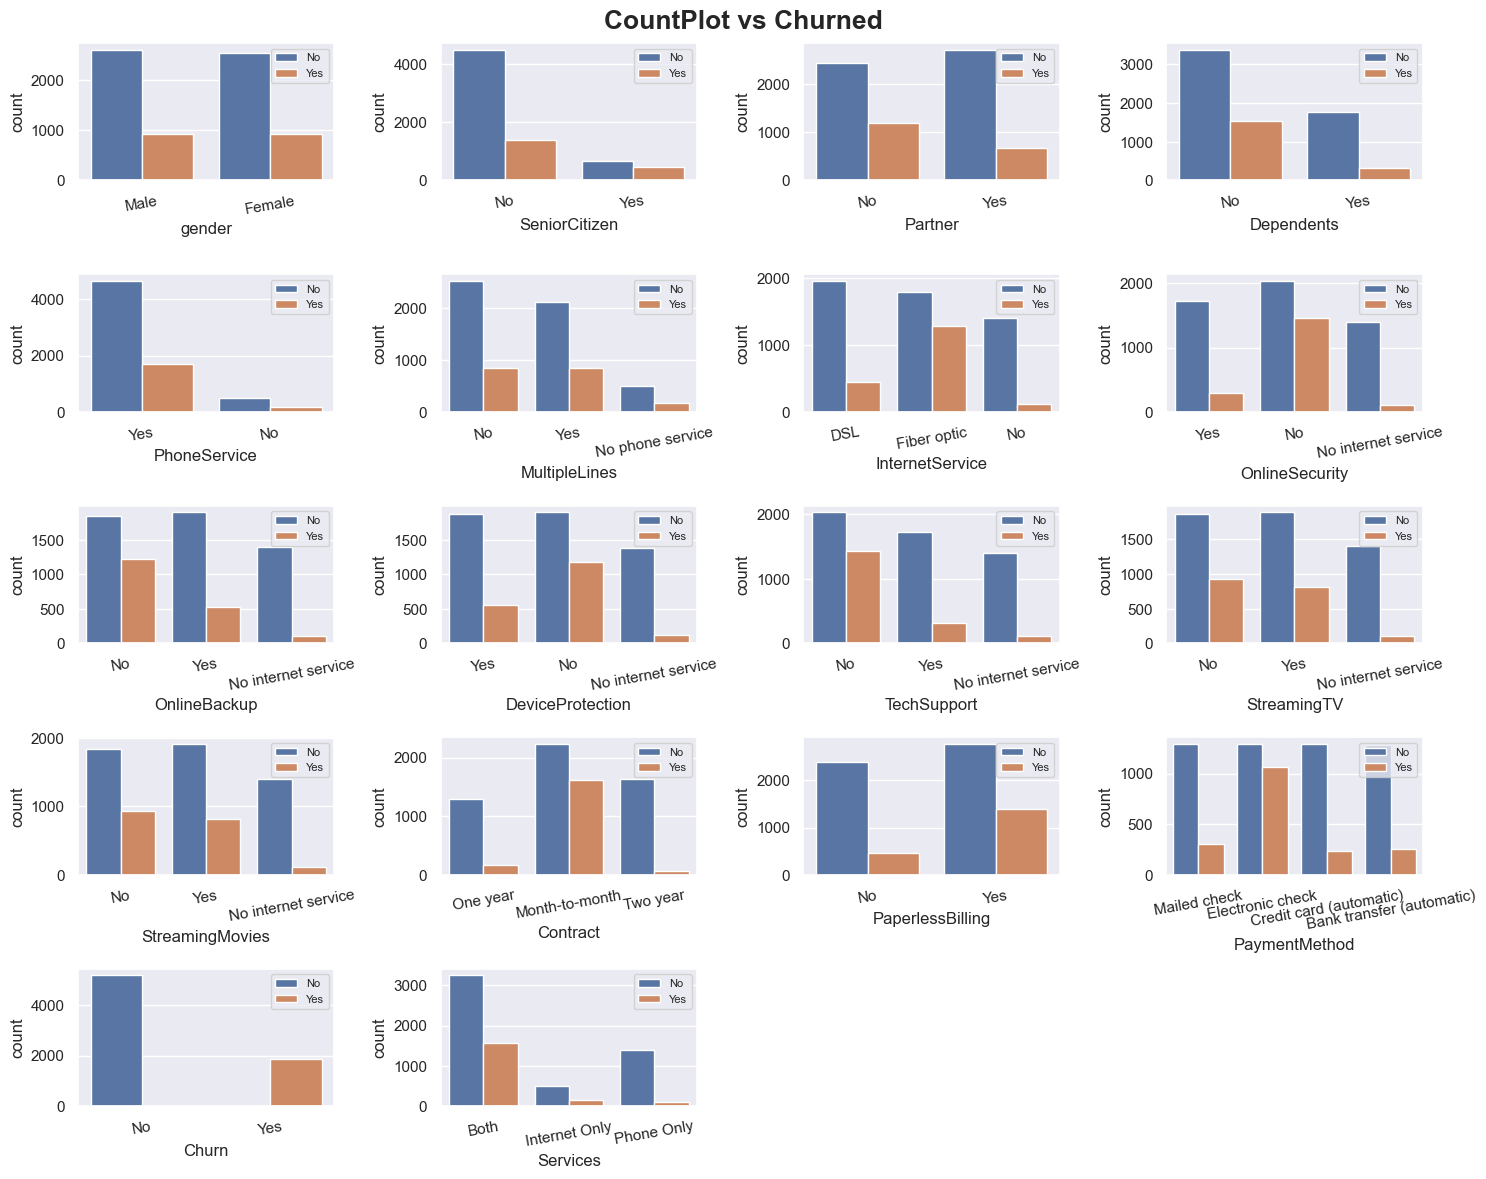

In [32]:
plt.figure(figsize=(15,12))

features = dfcat.columns
for i in np.arange(1, len(features)+1):
    plt.subplot(5, len(features)//3 - 2, i)
    sns.countplot(data=df, x=df[features[i-1]], hue='Churn')
    plt.legend(prop={'size': 8})
    plt.xticks(rotation=10)
    plt.xlabel(features[i-1])
plt.suptitle('CountPlot vs Churned', size=19, weight='bold')
plt.tight_layout(pad = 1)

Dibawah saya jabarkan beberapa kolom yang menarik :<br>
1.Untuk SeniorCitizen yang 'Yes', terlihat churn probabilitynya lebih tinggi dari yang 'No'.<br>
2.Untuk Partner dan Dependents, Churn probability lebih rendah jika nilainya 'Yes'.<br>
3.Customer yang tidak menggunakan MultipleLines, churn probabilitynya lebih rendah dari yang menggunakan MultipleLines.<br>
4.Churn probability fiber optic jauh lebih tinggi dari DSL.<br>
5.Untuk kolom benefits (OnlineSecurity sampai StreamingMovies), churn probabilitynya lebih rendah jika nilainya 'Yes' dari pada yang 'No'.<br>
6.Untuk Contract, walaupun jumlah Month-to-month contract merupakan yang tertinggi namun churn probabilitynya juga merupakan yang tertinggi.<br>
7.Untuk PaymentMethod kasusnya juga mirip dengan contract, walaupun Electronic check merupakan pilihan mayoritas namun churn probabilitnya juga yang tertinggi.<br>
8.Untuk services, 'Both' terlihat memiliki churn probability tertinggi dari yang lain.

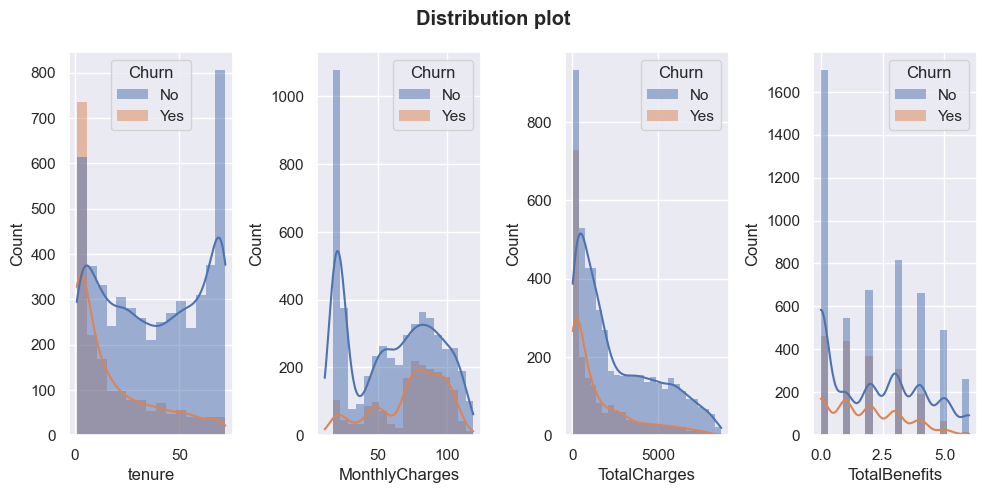

In [33]:
fig, axarr = plt.subplots(1,4, figsize=(10, 5))
for x in dfnum.columns:
    sns.histplot(data=df , x = dfnum[x],color='skyblue', kde=True, edgecolor='none', ax=axarr[dfnum.columns.get_loc(x)], hue='Churn')
plt.suptitle("Distribution plot", weight='bold')
fig.tight_layout(pad=1)

Terlihat pada kolom tenure, bahwa semakin tinggi tenure maka semakin tinggi churn probability. Untuk kolom MonthlyCharges dan TotalCharges sepertinya tidak ada banyak insights yang bisa kita dapat (tidak terdapat relationship yang jelas), Untuk kolom TotalBenefits dapat dilihat bahwa untuk distribusi not churn tertinggi ada pada 0 lalu drop dan naik kembali sampai tertinggi ada di angka 3 dan kemudian drop kembali sampai akhir sedangkan untuk yang churn semakin banyak benefits maka semakin rendah frekuensinya.

In [34]:
#mengubah binary column menjadi numerik agar bisa diproses di correlation dan pairplot.
dfcorr = df.copy()
binary = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
value_mapping = {
    'No': 0,
    'Yes' : 1,
    'Male' : 1,
    'Female' : 0
}

for col in binary:
    dfcorr[col] = dfcorr[col].map(value_mapping).astype('int64')

C:\Users\verti\AppData\Local\Temp\ipykernel_29428\779361340.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfcorr.corr(),annot=True, fmt='.2f')


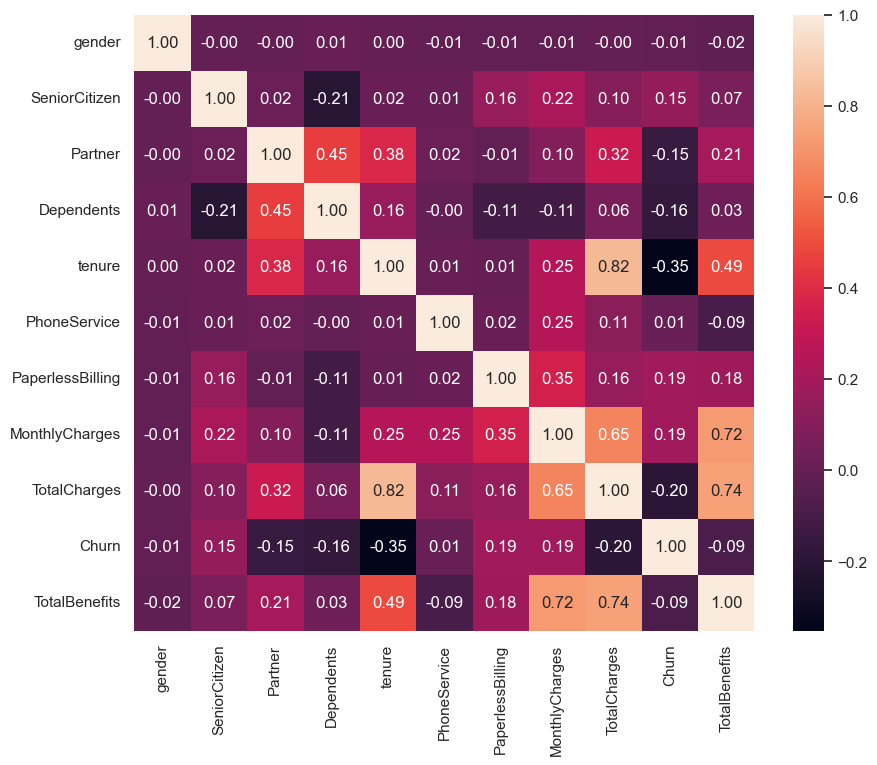

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcorr.corr(),annot=True, fmt='.2f')
plt.show()

>1.TotalBenefits dan TotalCharges memiliki korelasi yang cukup kuat di angka 0.75.<br>
2.MonthlyCharges memiliki korelasi yang cukup kuat dengan TotalBenefits dan TotalCharges.<br>
3.PaperlessBilling memiliki korelasi sedang dengan MonthlyCharges.<br>
4.PhoneService memiliki korelasi rendah dengan MonthlyCharges.<br>
5.tenure memiliki korelasi rendah terhadap MonthlyCharges, korelasi sedang terhadap Churn dan TotalBenefits dan korelasi tinggi terhadap TotalCharges.<br>
6.Partner memiliki korelasi sedang terhadap TotalCharges, tenure dan Dependents.<br>
7.Tenure dan churn memiliki korelasi negatif yang sedang, dimana semakin tinggi tenure maka semakin kecil kemungkinan customers untuk churn.<br>
8.Tenure dan totalbenefits memiliki korelasi sedang.<br>
Perlu diingat bahwa korelasi tidak sama dengan kausasi (saling berpengaruh). Walaupun hubungan korelasi tinggi namun bukan berarti bahwa kedua hal tersebut saling berpengaruh. Contoh korelasi antara TotalCharges dan TotalBenefits cukup tinggi yaitu diangka 0.75. Namun sebenarnya TotalBenefits tidak secara langsung mempengaruhi TotalCharges, melainkan tenure & MonthlyCharges lah yang mempengaruhi. Contoh kedua yaitu correlation antara PaperlessBilling dan Monthlycharges yaitu sebesar 0.35, padahal sebenarnya kedua hal ini sama sekali tidak berpengaruh, hanya saja customers yang mengambil produk MonthlyCharges yang tinggi lebih cenderung juga memilih PaperlessBilling. Tetapi bukan karena PaperlessBilling mempengaruhi MonthlyCharges(cmiiw).

In [36]:
#sns.pairplot(dfcorr, hue='Churn')
#plt.show()

>Ada beberapa hubungan kolom yang menarik yang akan saya bahas di deep dive EDA.

## Deep-Dive Exploratory Data Analysis
***

In [37]:
#create a function to plot probability.
def prob_plot(df,colom,x):
    means = df[colom].mean()
    medians = df[colom].median()
    data = df[df.Churn == 'Yes'][colom].astype('float64')
    data1 = df[df.Churn == 'No'][colom].astype('float64')
    
    kde = gaussian_kde(data)
    kde1 = gaussian_kde(data1)
    dist_space = np.linspace( min(data), max(data), 200)
    dist_space1 = np.linspace( min(data1), max(data1), 200)
    axarr[x].plot( dist_space, kde(dist_space), label='Churned', color='orange' )
    axarr[x].plot( dist_space1, kde1(dist_space1), label='Not churn', color='blue')
    axarr[x].axvline(x = means, linestyle = '--', color='g', label='Mean')
    axarr[x].axvline(x = medians, linestyle = '--', color='r', label='Median')
    axarr[x].set_title('Probability', fontweight='bold', size=12)
    axarr[x].set(ylabel = 'Probability', xlabel = colom)
    axarr[x].legend()

### Services & Internet service analysis

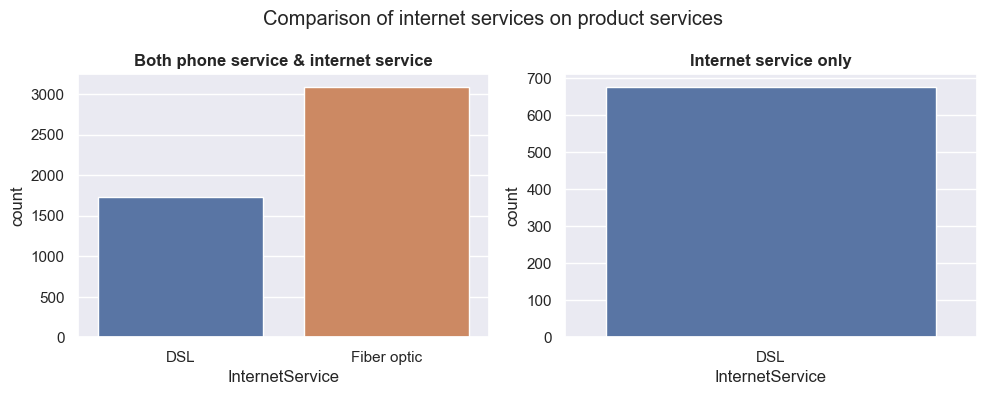

In [38]:
fig, axarr = plt.subplots(1,2, figsize=(10, 4))
sns.countplot(df[df.Services == 'Both'], x = 'InternetService', ax=axarr[0])
sns.countplot(df[df.Services == 'Internet Only'], x = 'InternetService', ax=axarr[1])
axarr[0].set_title("Both phone service & internet service", weight='bold')
axarr[1].set_title("Internet service only", weight='bold')
plt.suptitle("Comparison of internet services on product services")
plt.tight_layout(pad=1)

>Q1. Internet service apa yang paling diminati oleh customer yang mengambil kedua paket phone + internet sekaligus dengan paket internet only?<br>
Ans. Internet service yang paling diminati pada paket phone + internet adalah fiber optic sedangkan untuk internet only, internet service yang tersedia hanya DSL. Mungkin untuk menggunakan internet fiber optic juga diperlukan sambungan telepon sedangkan untuk DSL tidak harus.

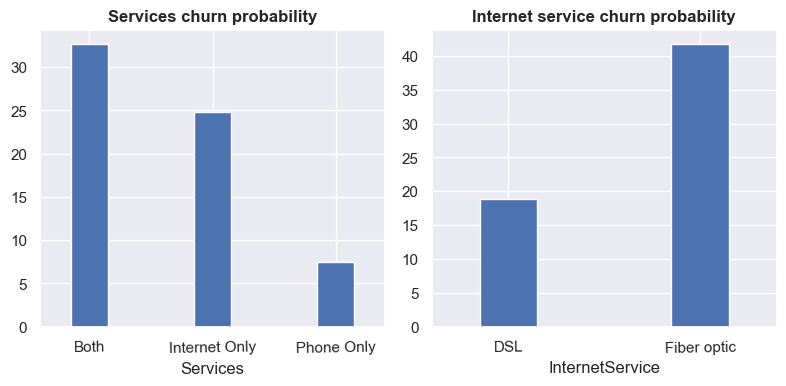

In [39]:
fig, axarr = plt.subplots(1,2, figsize=(8, 4))
df.groupby('Services')['Churn'].agg(lambda x: list(x).count('Yes') * 100 / len(list(x))).plot(kind='bar', width=0.3,rot=True, ax=axarr[0])
df[df.Services != 'Phone Only'].groupby(['InternetService'])['Churn'].agg(lambda x: list(x).count('Yes') * 100 / len(x)).plot(kind='bar', width=0.3,rot=True, ax=axarr[1])
axarr[0].set_title('Services churn probability', weight='bold')
axarr[1].set_title('Internet service churn probability', weight='bold')
plt.tight_layout(pad=1)
plt.savefig('services.png',dpi=600, transparent=True)

>Q2. Bagaimana probabilitas churn antar services dan internet service?? jelaskan!<br>
Ans. Untuk services, pengguna kedua internet + phone sekaligus adalah yang tertinggi yaitu lebih dari 30% sedangkan yang terendah adalah phone only dimana hanya sekitar 7% yang artinya produk phone dari perusahaan ini sudah sangat bagus. Untuk internet service, walaupun mayoritas memilih fiber optic namun probabilitas churnnya merupakan yang tertinggi yaitu sekitar 40% lebih, dimana DSL hanya 18%.

In [40]:
df[df.Services != 'Phone Only'].groupby('InternetService')['TotalBenefits'].mean()

InternetService
DSL            2.656704
Fiber optic    2.556527
Name: TotalBenefits, dtype: float64

>Q3. Apakah jenis internet service yang digunakan mempengaruhi jumlah benefits yang diambil?<br>
Ans. Tidak, bisa dilihat bahwa rata-rata benefits antara customers fiber optic dan DSL cukup sama yaitu sekitar 2 - 3 benefits.

### Monthly Charges Analysis

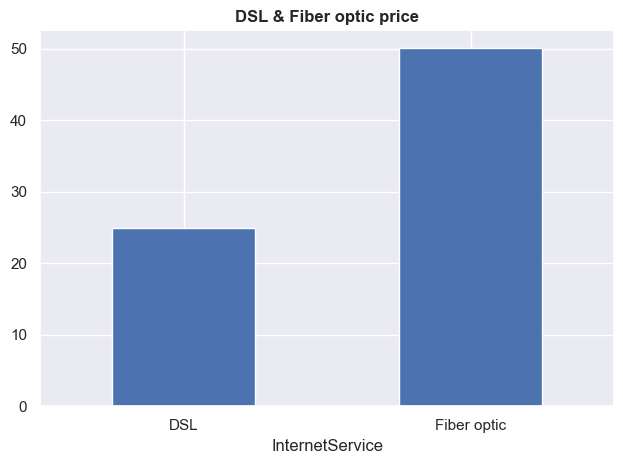

In [41]:
dfpure = df[(df.Services == 'Both') & (df.TotalBenefits == 0) & (df.MultipleLines == 'No')].copy()
(dfpure.groupby('InternetService')['MonthlyCharges'].mean() - 20).plot(kind='bar' ,rot = 0)
plt.tight_layout(pad=1)
plt.title("DSL & Fiber optic price", weight='bold')
plt.tight_layout()
plt.savefig('services2.png',dpi=600, transparent=True)

>Q4. Berapa perbedaan MonthlyCharges antara DSL dan Fiber optic?<br>
Ans. Setelah melakukan analisa dengan mengubah berbagai parameter, didapat bahwa Fiber optic lebih mahal sekitar 25 - 30 USD.

In [42]:
dfpure = df[(df.Services == 'Phone Only') & (df.TotalBenefits == 0)].copy()
dfpure.groupby('MultipleLines')['MonthlyCharges'].mean()

MultipleLines
No     19.957316
Yes    24.977812
Name: MonthlyCharges, dtype: float64

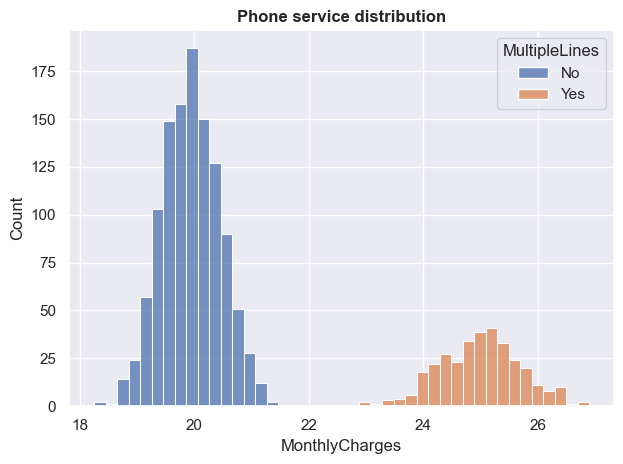

In [43]:
sns.histplot(data=dfpure, x = 'MonthlyCharges',hue='MultipleLines', multiple='stack')
plt.title('Phone service distribution', weight='bold')
plt.tight_layout()
plt.show()

>Q5. Berapakah produk phone service dengan multipleline dan yang tidak?<br>
Ans. Harga phone service tanpa multipleline adalah sekitar 20 USD dan sekitar 25 USD jika memakai multipleline.

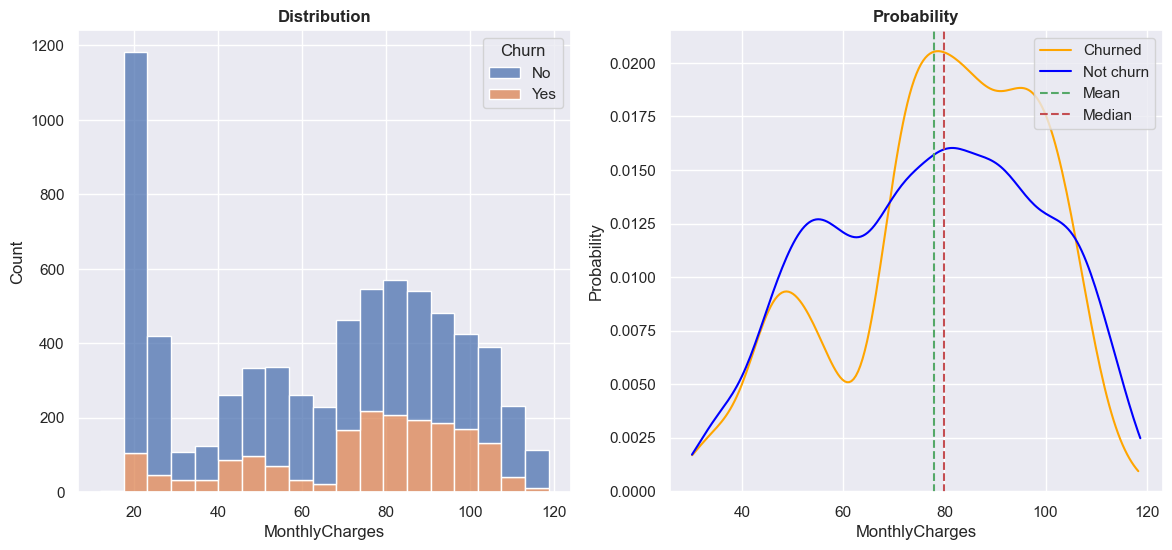

In [44]:
fig, axarr = plt.subplots(1,2, figsize=(14, 6))
g = sns.histplot(data=df, x = 'MonthlyCharges',hue='Churn', ax=axarr[0], multiple='stack')
axarr[0].set_title('Distribution', fontweight='bold', size=12)
#axarr[0].axvline(x = 30, linestyle = '--', color='black')
#axarr[0].axvline(x = 69, linestyle = '--', color='black')
#axarr[0].axvline(x = 19, linestyle = '--', color='black')
#axarr[0].axvline(x = 119, linestyle = '--', color='black')
#axarr[0].fill_between((30 , 69),1200, alpha=0.15, color='green')
#axarr[0].fill_between((19 , 30),1200, alpha=0.15, color='magenta')
#axarr[0].fill_between((69 , 119),1200, alpha=0.15, color='orange')
prob_plot(df[df.MonthlyCharges >= 30],'MonthlyCharges',1)
axarr[1].legend(loc='upper right')
plt.show()

>Q6. Buat segmentasi pemakaian produk terhadap MonthlyCharges dan buat plot probabilitas churnya!<br>
Ans.<Br> Penjelasan warna area:<br>
1.Untuk warna magenta : 92% pengguna phone only dan 8% pengguna internet only (DSL).<br>
2.Untuk warna hijau : 67% pengguna both internet & phone service (91% DSL, 9% Fiber optic) dan 33% pengguna internet only (DSL).<br>
3.Untuk warna orange : 100% pengguna both internet & phone service (83% pengguna fiber optic, 17% pengguna DSL).<br><br>
Pada plot ini bisa dilihat bahwa MonthlyCharges ter-rendah merupakan produk phone service tanpa internet. Kedua, mayoritas pengguna DSL berada pada rentan 30 - 70 USD dan fiber optic diatas 70 USD. Ketiga, melihat probability plot yang dikanan bahwa kenaikan churned probability jauh lebih tinggi dari not churn pada monthly charges +-60 - 90 USD... ini artinya terdapat kenaikan volume dari customers pada range harga ini namun kenaikan customers yang churned jauh lebih banyak secara rasio dari pada yang not churn.

In [45]:
dfpure = df[(df.InternetService == 'Fiber optic') & (df.Services == 'Both') & (df.MultipleLines == 'No')]
dfpureagg = dfpure.groupby('TotalBenefits')['MonthlyCharges'].agg('mean').reset_index()
dfpureagg['MonthlyCharges'] = dfpureagg.MonthlyCharges.round()

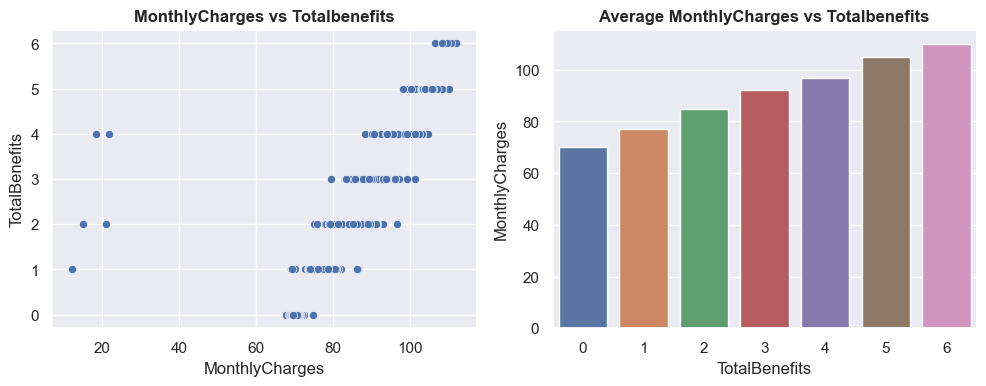

In [46]:
fig, axarr = plt.subplots(1,2, figsize=(10, 4))
sns.scatterplot(data=dfpure, x = 'MonthlyCharges', y = 'TotalBenefits', s=35, ax=axarr[0])
sns.barplot(dfpureagg, x = 'TotalBenefits', y = 'MonthlyCharges')
axarr[0].set_title('MonthlyCharges vs Totalbenefits', weight='bold')
axarr[1].set_title('Average MonthlyCharges vs Totalbenefits', weight='bold')
fig.tight_layout(pad = 1)
plt.show()

>Q7. Jelaskan hubungan antara TotalBenefits dengan MonthlyCharges! <br>
Ans. Bisa dilihat dari kedua plots diatas bahwasannya semakin banyak benefits yang diambil maka semakin mahal juga MonthlyChargesnya. Kenaikan setiap MonthlyCharges per benefit juga terlihat cukup equal yaitu sekitar 7 dollar setiap penambahan 1 benefits. FYI, jika kita memperhatikan pada plot sebelah kiri, terlihat bahwa 'spread' atau penyebaran nilai dari MonthlyCharges disetiap benefit cukup beragam, padahal kolom-kolom yang mempengaruhi nilai MonthlyCharges sudah difilter. Ini berarti masih ada variabel lain yang mempengaruhi nilai MonthlyCharges.

In [47]:
dfpure = df[(df.InternetService == 'Fiber optic') & (df.Services == 'Both') & (df.MultipleLines == 'No') & (df.TotalBenefits == 1)]
benefits = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
dfnew = pd.DataFrame()
for x in benefits:
    a = pd.DataFrame([x, dfpure[dfpure[x] == 'Yes']['MonthlyCharges'].min(), dfpure[dfpure[x] == 'Yes']['MonthlyCharges'].max(), dfpure[dfpure[x] == 'Yes']['MonthlyCharges'].mean(), dfpure[dfpure[x] == 'Yes']['MonthlyCharges'].median()]).transpose()
    dfnew = pd.concat([dfnew, a])
dfnew.columns = ['Benefit','MinCharges','MaxCharges','MeanCharges','MedianCharges']    

In [48]:
dfnew

,Benefit,MinCharges,MaxCharges,MeanCharges,MedianCharges
0,OnlineSecurity,73.2,80.3,74.965278,75.0
0,OnlineBackup,72.75,76.65,74.675556,74.65
0,DeviceProtection,68.95,76.65,74.213333,74.8
0,TechSupport,73.85,76.55,75.045455,74.7
0,StreamingTV,77.65,81.9,79.728906,79.725
0,StreamingMovies,12.0,86.45,79.078226,80.075


>Q8. Bagaimana perbandingan harga antara benefit? benefit manakah yang paling mahal?<br>
Ans. Bisa dilihat bahwa benefit dari OnlineSecurity sampai TechSupport harganya cukup sama sedangkan benefit StreamingTV dan StreamingMovies memiliki harga yang lebih tinggi dari yang lain yaitu sekitar 4 - 5 USD lebih tinggi. Data harga diatas termasuk harga fiber optic dan phone service tanpa multiplelines, jika ingin mengetahui harga per benefit maka tinggal dikurangi 70 USD saja.

### Anomaly detection

Dari analisa EDA diatas kita bisa melakukan pengecekan terhadap nilai MonthlyCharges, apakah terdapat nilai yang tidak sesuai?

In [49]:
def monthlychargesdiff(x):
    estimation = 0
    if x['PhoneService'] == 'Yes':
        estimation += 20
    if x['MultipleLines'] == 'Yes':
        estimation += 5
    if x['InternetService'] == 'DSL':
        estimation += 25
    if x['InternetService'] == 'Fiber optic':
        estimation += 50
        
    if (x['StreamingTV'] == 'Yes') & (x['StreamingMovies'] == 'Yes'):
        estimation += 20 + (x['TotalBenefits'] - 2) * 5
    elif (x['StreamingTV'] == 'Yes') | (x['StreamingMovies'] == 'Yes'):
        estimation += 10 + (x['TotalBenefits'] - 1) * 5
    else:
        estimation += x['TotalBenefits'] * 5
        
    return abs(1 - (estimation / x['MonthlyCharges'])) * 100
    
   

In [50]:
df['MonthlyChargesEstimationDifference'] = df.apply(monthlychargesdiff, axis=1)

In [51]:
df[df.MonthlyChargesEstimationDifference > 200]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Services,TotalBenefits,MonthlyChargesEstimationDifference
12,Female,No,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Two year,No,Credit card (automatic),29.00,2050.00,No,Both,6,296.551724
389,Male,No,Yes,Yes,69,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Credit card (automatic),12.00,880.00,Yes,Both,3,733.333333
666,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,No,...,Yes,Month-to-month,No,Electronic check,12.00,13.50,Yes,Both,1,566.666667
859,Male,No,No,Yes,45,Yes,Yes,Fiber optic,No,No,...,Yes,Two year,No,Bank transfer (automatic),26.41,1189.00,No,Both,3,278.644453
1439,Female,No,No,No,60,Yes,No,Fiber optic,No,Yes,...,Yes,Two year,Yes,Electronic check,18.26,1095.60,No,Both,4,447.645126
2185,Male,Yes,No,No,34,Yes,No,Fiber optic,No,Yes,...,Yes,One year,Yes,Electronic check,21.63,735.42,No,Both,4,362.320851
4090,Female,No,No,No,59,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),31.26,1846.55,No,Both,4,219.897633
5848,Female,Yes,No,No,1,Yes,No,Fiber optic,No,Yes,...,Yes,Month-to-month,Yes,Electronic check,15.00,15.56,Yes,Both,2,466.666667
6718,Female,Yes,No,No,1,Yes,No,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,21.00,22.10,Yes,Both,2,304.761905


In [52]:
df = df[df.MonthlyChargesEstimationDifference < 200].reset_index(drop=True)

Recap -- What we know so far<br>
1.Hal yang mempengaruhi MonthlyCharges adalah services, internet service, multiplelines, totalbenefits dan jenis benefitnya.<br>
2.Phone service yang menggunakan multiple line lebih mahal dari yang tidak (lebih mahal +- 5 USD).<br>
3.Semua pengguna internet fiber optic pasti menggunakan phone service.<br>
4.Pengguna fiber optic lebih banyak dari DSL, namun churn probabilitynya juga jauh lebih tinggi fiber optic dari pada DSL.<br>
5.Fiber optic lebih mahal sekitar 25 - 30 USD dari DSL.<br>
6.Internet service tidak berpengaruh terhadap jumlah benefits yang diambil.<br>
7.Churn probability meningkat drastis saat MonthlyCharges mulai menyentuh 60 USD.<br>
8.Semua benefit memiliki harga yang serupa kecuali untuk StreamingTV dan StreamingMovies dimana kedua benefit ini lebih mahal sekitar 4 - 5 USD.

### Customer analysis

In [53]:
def statuss(x):
    x = list(x)
    if (x[0] == 'Yes') & (x[1] == 'Yes'):
        return 'Both'
    elif (x[0] == 'Yes') & (x[1] == 'No'):
        return 'Partner Only'
    elif (x[0] == 'No') & (x[1] == 'Yes'):
        return 'Dependent Only'
    else:
        return 'Single'

In [54]:
df['Status'] = df[['Partner','Dependents']].apply(statuss, axis=1)

>Di atas saya membuat fitur baru bernama 'Status' dimana nilainya adalah:<br>
1.Jika tidak ada partner dan dependents maka nilainya 'Single'.<br>
2.Jika hanya ada partner saja maka nilainya 'Partner Only'.<br>
3.Jika hanya ada dependent saja maka nilainya 'Dependent Only'.<br>
4.Jika terdapat partner dan dependent maka nilainya 'Both'.<br>

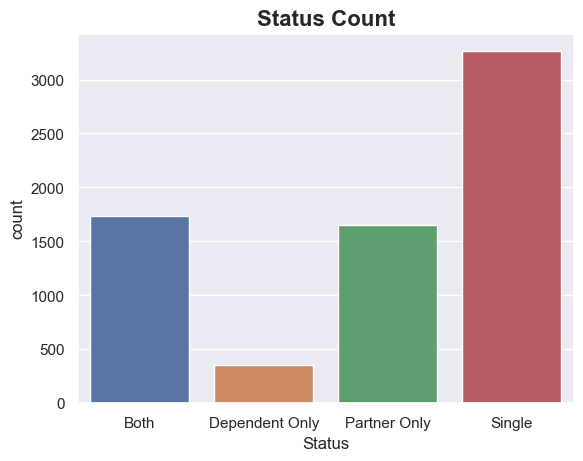

In [55]:
sns.countplot(df.sort_values('Status', ascending=True), x='Status')
plt.title('Status Count', size=16, weight='bold')
plt.show()

>Q9. Jelaskan segmentasi customer berdasarkan status partner dan dependent!<br>
Ans. Jumlah terbanyak customer adalah yang single, disusul oleh Partner only dan both yang jumlahnya cukup berimbang dan yang terakhir dependent only.

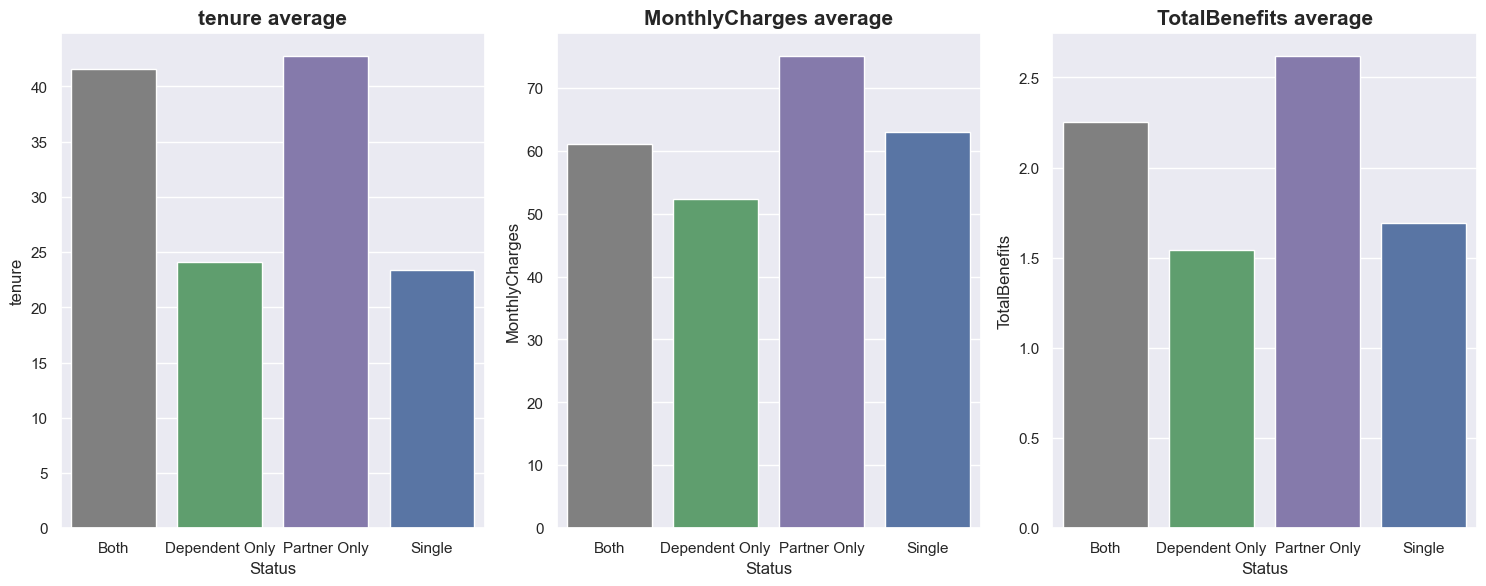

In [56]:
fig, axarr = plt.subplots(1,3, figsize=(15, 6))
k = ['tenure','MonthlyCharges','TotalBenefits']
for x in k:
    sns.barplot(df.groupby(['Status'])[[x]].mean().reset_index(), x ='Status', y =x, ax =axarr[k.index(x)],palette=['grey', 'g','m','b'])
    axarr[k.index(x)].set_title(f'{x} average', weight='bold', size=15)
fig.tight_layout(pad = 1)
plt.show()

>Q10. Bagaimana behaviour status customer terhadap tenure, MonthlyCharges dan TotalBenefits?<br>
Bisa dilihat plots diatas, bahwa customer dengan partner only adalah merupakan customer paling bagus. Mereka adalah customer ter-loyal, mereka mengambil produk dengan monthly charges tertinggi dan mereka merupakan pengguna benefits terbanyak. Customer yang memiliki kedua partner dan dependent juga cukup bagus namun tidak sebagus yang partner only. Untuk customer single, monthly charges yang dibayar cukup tinggi namun tenure nya tidak terlalu lama.

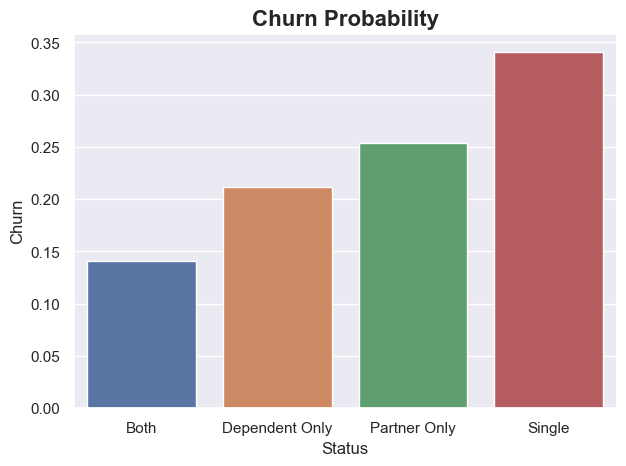

In [57]:
sns.barplot(df.groupby('Status')[['Churn']].agg(lambda x: list(x).count('Yes') / len(x)).reset_index(), x = 'Status' , y ='Churn')
plt.title('Churn Probability', weight='bold', size=16)
plt.tight_layout(pad=1)
plt.show()

>Q11. Status customer manakah yang paling tinggi churn probabilitynya?<br>
Ans. Customer Single adalah customer yang paling tinggi churn probabilitynya yang hampir mencapai 35%, disusul oleh partner only, dependent only dan both.

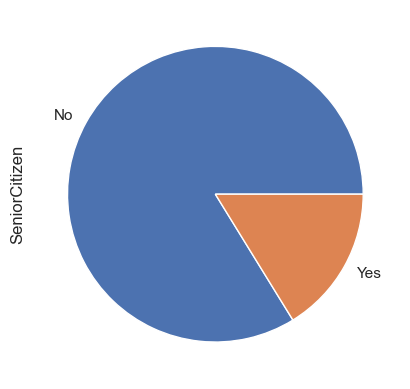

In [58]:
df.SeniorCitizen.value_counts().plot(kind='pie')
plt.show()

In [59]:
dfnew = df.groupby('SeniorCitizen')[['Status']].agg(Single = ('Status', lambda x: list(x).count('Single') * 100 / len(x)), PartnerOnly = ('Status', lambda x: list(x).count('Partner Only') * 100  / len(x)), Both = ('Status', lambda x: list(x).count('Both') * 100  / len(x)), DependentOnly = ('Status', lambda x: list(x).count('Dependent Only') * 100  / len(x)))

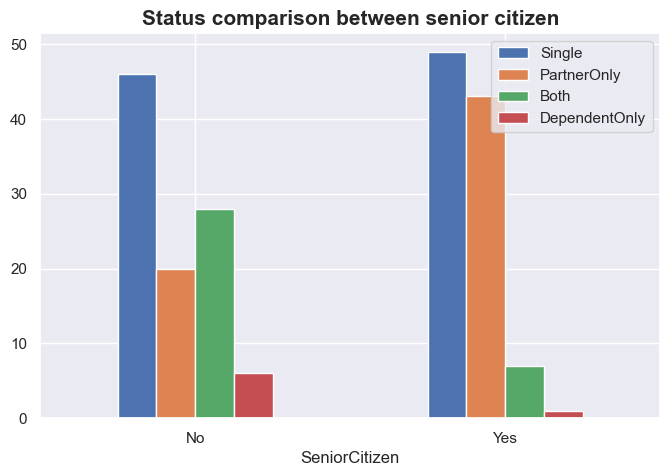

In [60]:
dfnew.round().plot(kind='bar',rot=0, figsize=(8,5))
plt.title("Status comparison between senior citizen", size=15, weight='bold')
plt.show()

>Q12. Bagaimana perbedaan status antara SeniorCitizen dan yang tidak?<br>
Dari grafik diatas, bisa dilihat bahwa orang muda dan tua mayoritas adalah single. Untuk orang tua, jumlah partner yang dimiliki sangat tinggi namun jumlah dependentsnya sangat rendah sedangkan untuk yang lebih muda, jumlah partner dan dependent lebih seimbang.IMHO, menurut saya ini cukup logis karena memang kebanyakan orang tua yang sudah pensiun tidak memiliki tanggungan lagi, sedangkan untuk orang lebih muda dan masih bekerja, jumlah tanggungan mereka pasti akan lebih banyak.

In [61]:
dfnew = df.groupby('Status')[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].agg(lambda x: list(x).count('Yes'))
dfnew['total'] = dfnew.apply('sum',axis=1)
for x in dfnew.drop(columns='total').columns:
    dfnew[x] = (dfnew[x] * 100 / dfnew.total).round()
dfnew.drop(columns='total', inplace=True)

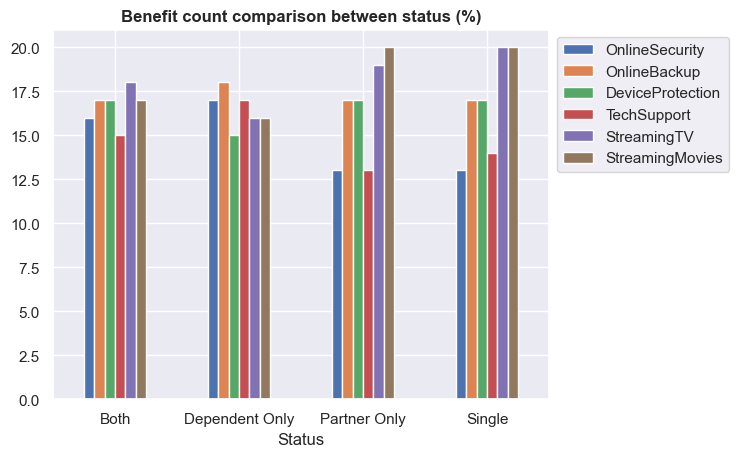

In [62]:
dfnew.plot(kind='bar', rot=0)
plt.title('Benefit count comparison between status (%)', size=12, weight='bold')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

>Q13. Analisa benefit yang diambil di setiap segmen customer!<br>
Berdasarkan plot diatas, customer single dan partner only mayoritas memilih benefit hiburan yaitu streaming tv dan streaming movies disusul oleh online backup dan device protection tetapi untuk tech support dan online security terlihat tidak terlalu diminati. Untuk customer dependent, benefit yang terpenting adalah online security dan online backup sedangkan yang terendah adalah device protection. Untuk customer both terlihat bahwa semua nilai benefit tidak berbeda begitu jauh satu sama lain atau nilainya cukup equal. Kesimpulan : customer tanpa dependent terlihat lebih mementingkan benefit hiburan sedangkan yang memiliki dependent terlihat lebih mementingkan keamanan. Terakhir benefit online backup juga cukup penting disemua kalangan customer. 

### Benefits analysis

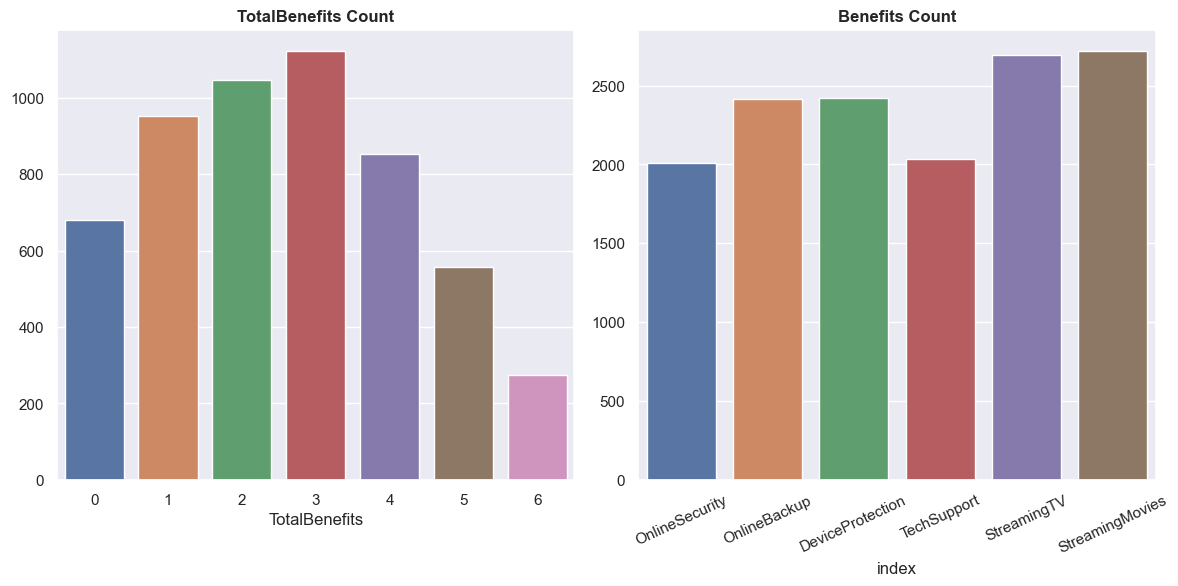

In [63]:
fig, axarr = plt.subplots(1,2, figsize=(12, 6))
sns.countplot(df[df.Services != 'Phone Only'], x = 'TotalBenefits', ax=axarr[0])
sns.barplot(df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].apply(lambda x: list(x).count('Yes')).reset_index(), x = 'index', y = 0, ax=axarr[1])
axarr[0].set_title('TotalBenefits Count', size=12, weight='bold')
axarr[0].set(ylabel=None)
axarr[1].set(ylabel=None)
axarr[1].set_title('Benefits Count', size=12, weight='bold')
axarr[1].tick_params(axis='x', rotation=25)
fig.tight_layout(pad=1)
plt.show()

>Q14. Berapa TotalBenefits terbanyak dan benefit apa saja yang paling banyak dipilih oleh customer?<br>
Terlihat bahwa rata2 customer kebanyakan mengambil 3 benefits. Untuk benefit terfavorit ada pada sesi entertain yaitu StreamingTV dan StreamingMovies. FYI, untuk TotalBenefits saat kita melakukan standard EDA yang tertinggi adalah 0 benefits dikarenakan produk 'Phone Only' semuanya terhitung 0 benefits. Analisa Totalbenefits yang benar adalah kita mengexclude 'Phone Only' karena benefit hanya bisa diambil jika memiliki koneksi internet.

In [64]:
dfnew = pd.DataFrame()
for x in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    a = list(df[df[x] == 'Yes']['Churn']).count('Yes') / len(df[df[x] == 'Yes']['Churn'])
    dfnew = pd.concat([dfnew, pd.DataFrame([x],[a])])

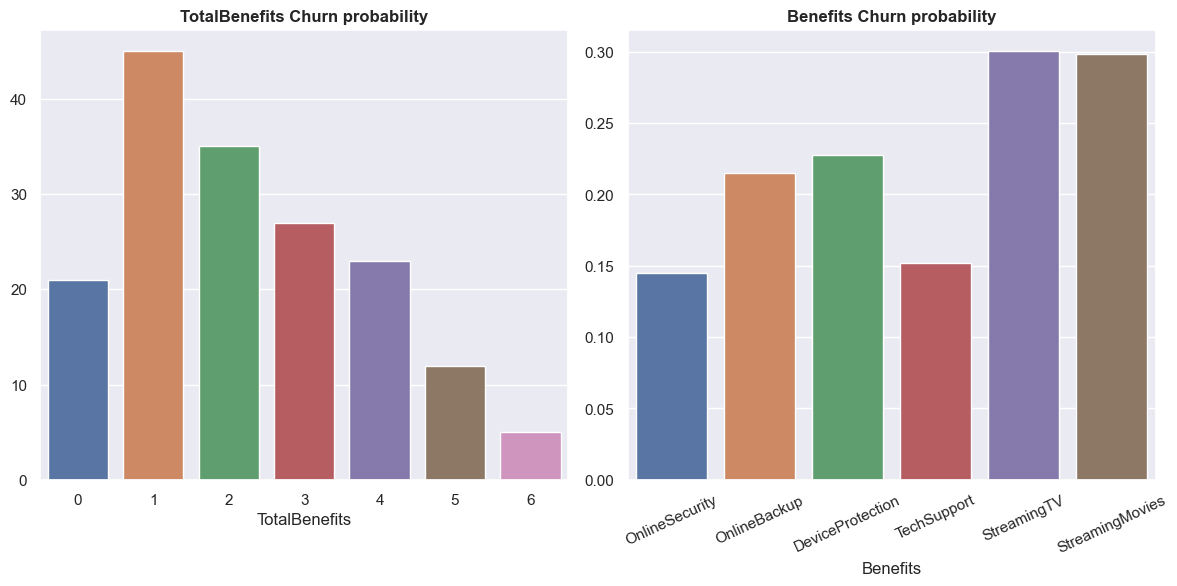

In [65]:
fig, axarr = plt.subplots(1,2, figsize=(12, 6))
sns.barplot(df.groupby('TotalBenefits')[['Churn']].agg(lambda x: list(x).count('Yes') * 100 / len(x)).round().reset_index(), x = 'TotalBenefits', y = 'Churn', ax=axarr[0])
sns.barplot(dfnew.reset_index(), x = 0, y = 'index', ax=axarr[1])
axarr[0].set_title('TotalBenefits Churn probability', size=12, weight='bold')
axarr[0].set(ylabel=None)
axarr[1].set(ylabel=None, xlabel='Benefits')
axarr[1].set_title('Benefits Churn probability', size=12, weight='bold')
axarr[1].tick_params(axis='x', rotation=25)
fig.tight_layout(pad=1)

>Q15. Plot dan jelaskan churn probability untuk TotalBenefits dan benefits!<br>
Totalbenefit dengan kemungkinan churn tertinggi ada pada 1 benefit. Walaupun benefit streamingTV dan streamingMovies merupakan benefit yang paling diminati namun secara rasio, kedua benefit ini malah yang memiliki kemungkinan churn tertinggi.

### Churn analysis

>Q16. Temukan dan jelaskan pattern perilaku customer yang churn dan tidak!

>Pada tahap ini, saya akan menganalisa pattern behaviour customer yang churn dan tidak. Namun, saya perlu memplot 5 dimensi features dalam 1 scatter plot. Tentu hal ini akan sangat membingungkan dan saya akan membagi menjadi 2 scatter plot saja. First, saya akan membuat scatter plot tenure vs MonthlyCharges vs churn. Kedua, saya akan membuat scatter plot tenure vs MonthlyCharges vs TotalBenefits vs InternetService.

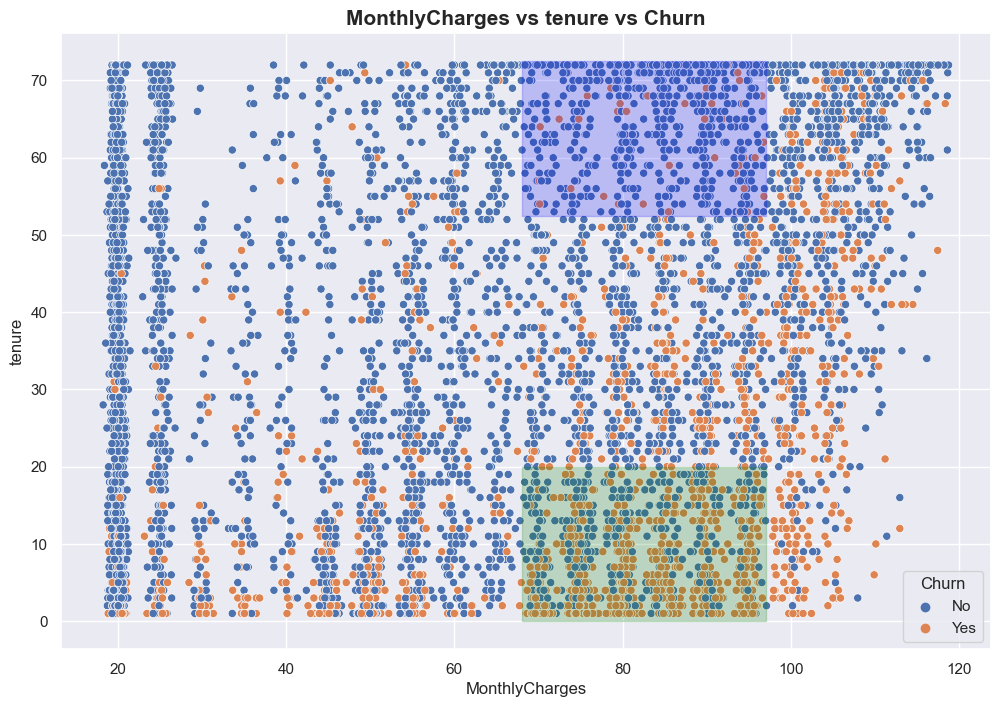

In [66]:
fig, axarr = plt.subplots(1, figsize=(12, 8))
sns.scatterplot(data=df, x = 'MonthlyCharges', y = 'tenure', hue ='Churn', s=35)
plt.fill_between((68 , 97),20, alpha=0.2, color='green')
plt.fill_between((68 , 97),52.5, 72.5, alpha=0.2, color='blue')
plt.title('MonthlyCharges vs tenure vs Churn', size = 15, weight = 'bold')
plt.show()

>Berdasarkan hasil analisa sebelumnya, didapat bahwa mayoritas customer ada pada range MonthlyCharges sekitar 60 dollar sampai dengan sekitar 100 dollar. Pada range harga ini saya menemukan sebuah pattern yang cukup jelas yaitu pada area hijau terlihat bahwa banyak customer churn berkumpul pada area ini, sedangkan pada range harga yang sama pada area biru terlihat bahwa justru customer tidak churn yang mendominasi. Pada area hijau nilai tenurenya cukup rendah yaitu hanya 0 - 20 bulan saja (new customers), sedangkan pada area biru nilai tenurenya sudah tinggi (loyal customers).

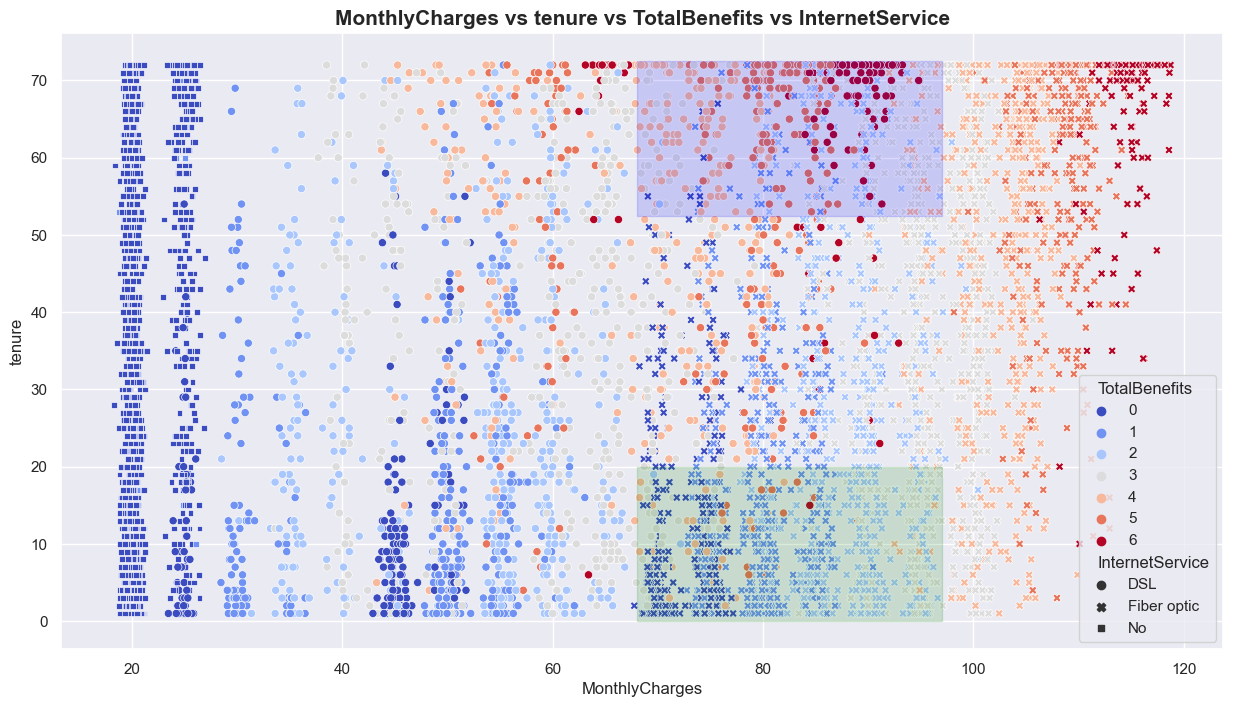

In [67]:
plt.subplots(1, figsize=(15, 8))
sns.scatterplot(data=df, x = 'MonthlyCharges', y = 'tenure', s=35, hue='TotalBenefits', style='InternetService', palette='coolwarm')
plt.fill_between((68 , 97),20, alpha=0.15, color='green')
plt.fill_between((68 , 97),52.5, 72.5, alpha=0.15, color='blue')
plt.title('MonthlyCharges vs tenure vs TotalBenefits vs InternetService', size = 15, weight = 'bold')
plt.show()

> Masih pada area chart yang sama, saya merombak sedikit features pada scatterplot ini. Saya mengganti feature Churn menjadi TotalBenefits dan InternetService. Bisa dilihat secara jelas bahwa pada area chart hijau, mayoritas internet service yang digunakan adalah fiber optic namun totalbenefits yang diambil sedikit sedangkan pada area chart biru mayoritas menggunakan internet service DSL namun totalbenefitsnya lebih banyak. Pada range harga ini, customers hanya dihadapkan oleh 2 pilihan yaitu menggunakan internet fiber optic yang lebih mahal dari DSL tetapi imbasnya totalbenefits yang bisa dipilih lebih sedikit atau menggunakan internet DSL yang murah namun totalbenefits yang diambil bisa lebih banyak. Dan ternyata customers lebih memilih internet service DSL yang lebih murah namun dengan totalbenefits yang lebih banyak. Kemungkinan hal ini bisa terjadi karena perbedaan harga antara fiber optic dan dsl tidak setara dengan perbedaan keuntungannya yang membuat fiber optic menjadi tidak worth it.

## Modelling
***

### Feature selection & encoding

In [68]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Services,TotalBenefits,MonthlyChargesEstimationDifference,Status
0,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,Both,2,3.424056,Single
1,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Both,0,0.990099,Single
2,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,Both,2,1.010101,Dependent Only
3,Female,No,No,No,10,No,No phone service,DSL,Yes,No,...,Month-to-month,No,Mailed check,29.75,301.90,No,Internet Only,1,0.840336,Single
4,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Both,4,0.190840,Partner Only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,One year,Yes,Mailed check,84.80,1990.50,No,Both,5,0.235849,Both
6998,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,Both,4,1.744186,Both
6999,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,Internet Only,1,1.351351,Both
7000,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Both,0,0.806452,Partner Only


In [69]:
df.drop(columns = ['Services','MonthlyChargesEstimationDifference','Status','PaperlessBilling','PaymentMethod'], inplace=True)

In [70]:
KolomBenefit = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for x in KolomBenefit:
    df[x] = df[x].apply(lambda x: 'No' if x == 'No internet service' else x)

In [71]:
df['MultipleLines'] = df[x].apply(lambda x: 'No' if x == 'No phone service' else x)

In [72]:
value_mapping = {
    'No': 0,
    'Yes' : 1,
    'Male' : 1,
    'Female' : 0
}

In [73]:
binary = list(df.drop(columns=['tenure','InternetService','MonthlyCharges','TotalCharges','TotalBenefits','Contract']).columns)

for col in binary:
    df[col] = df[col].map(value_mapping).astype('int64')

In [74]:
df['Contract'] = df['Contract'].apply(lambda x: 1 if x == 'Month-to-month' else 2 if x == 'One year' else 3)

In [75]:
df['is_cheap'] = df.apply(lambda x: 1 if (x['InternetService'] == 'Fiber optic') & (x['TotalBenefits'] < 3) else 0, axis = 1)

In [76]:
df = pd.get_dummies(df, columns=['InternetService'])

In [77]:
df = df[['Contract','tenure','InternetService_Fiber optic','MonthlyCharges','InternetService_No','Churn']]

### Splits data and define custom function

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [79]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Churn'), df.Churn.to_numpy(), test_size = 0.2, random_state=123)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [80]:
def my_scorer_2(clf, X, y_true, thres = np.arange(0.1,1,0.1)):
    result_dict = {}
    for threshold in np.atleast_1d(thres):
        y_pred = (clf.predict_proba(X)[:,1] > threshold).astype(int)
        X_segment = (X['MonthlyCharges'] > 95).to_numpy().astype(int)
        y_stack = np.column_stack((X_segment, y_pred, y_true))
        y_stack_reg, y_stack_vip = y_stack[y_stack[:,0] == 0], y_stack[y_stack[:,0] == 1]
        cm_reg = confusion_matrix(y_stack_reg[:,2], y_stack_reg[:,1])
        cm_vip = confusion_matrix(y_stack_vip[:,2], y_stack_vip[:,1])
        fn_reg, fn_vip = cm_reg[1][0], cm_vip[1][0]
        fp = cm_reg[0][1] + cm_vip[0][1]
        loss_score = (fp * 1) + (fn_reg * 3) + (fn_vip * 5)
        result_dict[threshold] = np.array([loss_score, metrics.precision_score(y_true, y_pred, zero_division = 0), 
                                           metrics.recall_score(y_true, y_pred), metrics.f1_score(y_true, y_pred)])
        
    result_np = np.array([np.insert(value, 0, key) for key, value in result_dict.items()])
    best_np = result_np[result_np[:,1] == np.min(result_np[:,1])][0]
    return best_np

def my_scorer_threshold(clf, X, y_true):
    return my_scorer_2(clf, X, y_true)[0]

def my_scorer_ls(clf, X, y_true):
    return my_scorer_2(clf, X, y_true)[1]

def my_scorer_precision(clf, X, y_true):
    return my_scorer_2(clf, X, y_true)[2]

def my_scorer_recall(clf, X, y_true):
    return my_scorer_2(clf, X, y_true)[3]

def my_scorer_f1(clf, X, y_true):
    return my_scorer_2(clf, X, y_true)[4]
        
        

In [81]:
grid_scoring = {
    'threshold': my_scorer_threshold,
    'loss_score': my_scorer_ls,
    'precision': my_scorer_precision,
    'recall': my_scorer_recall,
    'f1': my_scorer_f1
}

In [82]:
X_segment = (X_train['MonthlyCharges'] > 95).to_numpy().astype(int)
arr_weight = np.column_stack((X_segment, y_train))
weight = np.apply_along_axis(lambda x: 1 if x[1] == 0 else 5 if x[0] == 1 else 3 , axis=1, arr=arr_weight)

### Model building 1 / Hyperparameter tuning + threshold tuning

In [83]:
#RANDOM FOREST MODELLING

#define parameter for tuning
param_grid_rf = {
    'n_estimators': [250 , 400],
    'max_depth': [10, 25, 50],
    'min_samples_split': [25, 50, 70, 120],
    'min_samples_leaf': [50, 75, 120],
    'bootstrap' : [True, False]
}

#run grid search cv
rf = GridSearchCV(estimator = RandomForestClassifier(),
                  param_grid = param_grid_rf,
                  cv=5,
                  scoring = grid_scoring, refit=False, n_jobs = -1)

#fit grid search cv with train data
rf.fit(X_train, y_train)

#selecting the best parameter and metrics
grid_result = pd.DataFrame(rf.cv_results_)
grid_result = grid_result[grid_result['mean_test_loss_score'] == grid_result['mean_test_loss_score'].min()][['params','mean_test_threshold','mean_test_loss_score','mean_test_precision','mean_test_recall','mean_test_f1']]

#train model with the best hyperparameter
rf = RandomForestClassifier(**grid_result.iloc[0,0])

#train model with train data
rf = rf.fit(X_train, y_train)

#evaluate the model
mb1_rf = my_scorer_2(rf, X_test, y_test, grid_result.iloc[0,1])

In [84]:
print(b)

NameError: name 'b' is not defined

In [ ]:
#XGBOOST MODELLING

#define parameter for tuning
param_grid_xg = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500],
    'max_depth': [5, 10, 25],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#run grid search cv
xg = GridSearchCV(estimator = XGBClassifier(),
                  param_grid = param_grid_xg,
                  cv=5,
                  scoring = grid_scoring, refit=False, n_jobs = -1)

#fit grid search cv with train data
xg.fit(X_train, y_train)

#selecting the best parameter and metrics
grid_result = pd.DataFrame(xg.cv_results_)
grid_result = grid_result[grid_result['mean_test_loss_score'] == grid_result['mean_test_loss_score'].min()][['params','mean_test_threshold','mean_test_loss_score','mean_test_precision','mean_test_recall','mean_test_f1']]

#train model with the best hyperparameter
xg = XGBClassifier(**grid_result.iloc[0,0])

#train model with train data
xg = xg.fit(X_train, y_train)

#evaluate the model
mb1_xg = my_scorer_2(xg, X_test, y_test, grid_result.iloc[0,1])


In [ ]:
#LOGISTIC REGRESSION MODELLING

#define parameter for tuning
param_grid_lg = {
    'penalty': ['l1', 'l2'], 
    'C': [0.1, 1.0, 10.0],  
    'solver': ['liblinear'],  
    'max_iter': [50,100,200] 
}

#run grid search cv
lg = GridSearchCV(estimator = LogisticRegression(),
                  param_grid = param_grid_lg,
                  cv=5,
                  scoring = grid_scoring, refit=False, n_jobs = -1)

#fit grid search cv with train data
lg.fit(X_train, y_train)

#selecting the best parameter and metrics
grid_result = pd.DataFrame(lg.cv_results_)
grid_result = grid_result[grid_result['mean_test_loss_score'] == grid_result['mean_test_loss_score'].min()][['params','mean_test_threshold','mean_test_loss_score','mean_test_precision','mean_test_recall','mean_test_f1']]

#train model with the best hyperparameter
lg = LogisticRegression(**grid_result.iloc[0,0])

#train model with train data
lg = lg.fit(X_train, y_train)

#evaluate the model
mb1_lg = my_scorer_2(lg, X_test, y_test, grid_result.iloc[0,1])


In [ ]:
result_mb1 = pd.DataFrame([mb1_rf,mb1_xg,mb1_lg])
result_mb1

### Model building 2 / Hyperparameter tuning + threshold tuning + SMOTE

In [ ]:
#RANDOM FOREST MODELLING

#define parameter for tuning
param_grid_rf_smote = {
    'class__n_estimators': [250 , 400],
    'class__max_depth': [10, 25, 50],
    'class__min_samples_split': [25, 50, 70, 120],
    'class__min_samples_leaf': [50, 75, 120],
    'class__bootstrap' : [True, False]
}

#create imbalanced pipeline to SMOTE 
pipelinerf = Pipeline([
        ('sampling', SMOTE()),
        ('class', RandomForestClassifier())])

#run grid search cv
rf = GridSearchCV(estimator = pipelinerf,
                  param_grid = param_grid_rf_smote,
                  cv=5,
                  scoring = grid_scoring, refit=False, n_jobs = -1)

#fit grid search cv with train data
rf.fit(X_train, y_train)

#selecting the best parameter and metrics
grid_result = pd.DataFrame(rf.cv_results_)
grid_result = grid_result[grid_result['mean_test_loss_score'] == grid_result['mean_test_loss_score'].min()][['params','mean_test_threshold','mean_test_loss_score','mean_test_precision','mean_test_recall','mean_test_f1']]
params = grid_result.iloc[0,0]

params_update = {}
for key, value in params.items():
    new_key = key.replace('class__', '')
    params_update[new_key] = value
params = params_update
    
#train model with the best hyperparameter
rf = RandomForestClassifier(**params)

#train model with SMOTE train data
X_train1, y_train1 = SMOTE().fit_resample(X_train, y_train)
rf = rf.fit(X_train1, y_train1)

#evaluate the model
mb2_rf = my_scorer_2(rf, X_test, y_test, grid_result.iloc[0,1])

In [ ]:
#XGBOOST MODELLING

#define parameter for tuning
param_grid_xg_smote = {
    'class__learning_rate': [0.1, 0.01, 0.001],
    'class__n_estimators': [100, 500],
    'class__max_depth': [5, 10, 25],
    'class__subsample': [0.8, 0.9, 1.0],
    'class__colsample_bytree': [0.8, 0.9, 1.0]
}

#create imbalanced pipeline to SMOTE 
pipelinexg = Pipeline([
        ('sampling', SMOTE()),
        ('class', XGBClassifier())])

#run grid search cv
xg = GridSearchCV(estimator = pipelinexg,
                  param_grid = param_grid_xg_smote,
                  cv=5,
                  scoring = grid_scoring, refit=False, n_jobs = -1)

#fit grid search cv with train data
xg.fit(X_train, y_train)

#selecting the best parameter and metrics
grid_result = pd.DataFrame(xg.cv_results_)
grid_result = grid_result[grid_result['mean_test_loss_score'] == grid_result['mean_test_loss_score'].min()][['params','mean_test_threshold','mean_test_loss_score','mean_test_precision','mean_test_recall','mean_test_f1']]
params = grid_result.iloc[0,0]

params_update = {}
for key, value in params.items():
    new_key = key.replace('class__', '')
    params_update[new_key] = value
params = params_update
    
#train model with the best hyperparameter
xg = XGBClassifier(**params)

#train model with SMOTE train data
X_train1, y_train1 = SMOTE().fit_resample(X_train, y_train)
xg = xg.fit(X_train1, y_train1)

#evaluate the model
mb2_xg = my_scorer_2(xg, X_test, y_test, grid_result.iloc[0,1])

In [ ]:
#LOGISTIC REGRESSION MODELLING

#define parameter for tuning
param_grid_lg_smote = {
    'class__penalty': ['l1', 'l2'], 
    'class__C': [0.1, 1.0, 10.0],  
    'class__solver': ['liblinear'],  
    'class__max_iter': [50,100,200] 
}


#create imbalanced pipeline to SMOTE 
pipelinelg = Pipeline([
        ('sampling', SMOTE()),
        ('class', LogisticRegression())])

#run grid search cv
lg = GridSearchCV(estimator = pipelinelg,
                  param_grid = param_grid_lg_smote,
                  cv=5,
                  scoring = grid_scoring, refit=False, n_jobs = -1)

#fit grid search cv with train data
lg.fit(X_train, y_train)

#selecting the best parameter and metrics
grid_result = pd.DataFrame(lg.cv_results_)
grid_result = grid_result[grid_result['mean_test_loss_score'] == grid_result['mean_test_loss_score'].min()][['params','mean_test_threshold','mean_test_loss_score','mean_test_precision','mean_test_recall','mean_test_f1']]
params = grid_result.iloc[0,0]

params_update = {}
for key, value in params.items():
    new_key = key.replace('class__', '')
    params_update[new_key] = value
params = params_update
    
#train model with the best hyperparameter
lg = LogisticRegression(**params)

#train model with SMOTE train data
X_train1, y_train1 = SMOTE().fit_resample(X_train, y_train)
lg = lg.fit(X_train1, y_train1)

#evaluate the model
mb2_lg = my_scorer_2(lg, X_test, y_test, grid_result.iloc[0,1])

In [ ]:
result_mb2 = pd.DataFrame([mb2_rf,mb2_xg,mb2_lg])
result_mb2

### Model building 3 / Hyperparameter tuning + threshold tuning + custom weight

In [ ]:
#RANDOM FOREST MODELLING

#define parameter for tuning
param_grid_rf = {
    'n_estimators': [250 , 400],
    'max_depth': [10, 25, 50],
    'min_samples_split': [25, 50, 70, 120],
    'min_samples_leaf': [50, 75, 120],
    'bootstrap' : [True, False]
}

#run grid search cv
rf = GridSearchCV(estimator = RandomForestClassifier(),
                  param_grid = param_grid_rf,
                  cv=5,
                  scoring = grid_scoring, refit=False, n_jobs = -1)

#fit grid search cv with train data
rf.fit(X_train, y_train, sample_weight = weight)

#selecting the best parameter and metrics
grid_result = pd.DataFrame(rf.cv_results_)
grid_result = grid_result[grid_result['mean_test_loss_score'] == grid_result['mean_test_loss_score'].min()][['params','mean_test_threshold','mean_test_loss_score','mean_test_precision','mean_test_recall','mean_test_f1']]

#train model with the best hyperparameter
rf = RandomForestClassifier(**grid_result.iloc[0,0])

#train model with train data
rf = rf.fit(X_train, y_train, sample_weight = weight)

#evaluate the model
mb3_rf = my_scorer_2(rf, X_test, y_test, grid_result.iloc[0,1])

In [ ]:
#XGBOOST MODELLING

#define parameter for tuning
param_grid_xg = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500],
    'max_depth': [5, 10, 25],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#run grid search cv
xg = GridSearchCV(estimator = XGBClassifier(),
                  param_grid = param_grid_xg,
                  cv=5,
                  scoring = grid_scoring, refit=False, n_jobs = -1)

#fit grid search cv with train data
xg.fit(X_train, y_train, sample_weight = weight)

#selecting the best parameter and metrics
grid_result = pd.DataFrame(xg.cv_results_)
grid_result = grid_result[grid_result['mean_test_loss_score'] == grid_result['mean_test_loss_score'].min()][['params','mean_test_threshold','mean_test_loss_score','mean_test_precision','mean_test_recall','mean_test_f1']]

#train model with the best hyperparameter
xg = XGBClassifier(**grid_result.iloc[0,0])

#train model with train data
xg = xg.fit(X_train, y_train, sample_weight = weight)

#evaluate the model
mb3_xg = my_scorer_2(xg, X_test, y_test, grid_result.iloc[0,1])


In [ ]:
#LOGISTIC REGRESSION MODELLING

#define parameter for tuning
param_grid_lg = {
    'penalty': ['l1', 'l2'], 
    'C': [0.1, 1.0, 10.0],  
    'solver': ['liblinear'],  
    'max_iter': [50,100,200] 
}


#run grid search cv
lg = GridSearchCV(estimator = LogisticRegression(),
                  param_grid = param_grid_lg,
                  cv=5,
                  scoring = grid_scoring, refit=False, n_jobs = -1)

#fit grid search cv with train data
lg.fit(X_train, y_train, sample_weight = weight)

#selecting the best parameter and metrics
grid_result = pd.DataFrame(lg.cv_results_)
grid_result = grid_result[grid_result['mean_test_loss_score'] == grid_result['mean_test_loss_score'].min()][['params','mean_test_threshold','mean_test_loss_score','mean_test_precision','mean_test_recall','mean_test_f1']]

#train model with the best hyperparameter
lg = LogisticRegression(**grid_result.iloc[0,0])

#train model with train data
lg = lg.fit(X_train, y_train, sample_weight = weight)

#evaluate the model
mb3_lg = my_scorer_2(lg, X_test, y_test, grid_result.iloc[0,1])


In [ ]:
result_mb3 = pd.DataFrame([mb3_rf,mb3_xg,mb3_lg])
result_mb3

#---------------stop-------------------------------------------

In [ ]:
import pandas as pd

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

In [ ]:
pdp = partial_dependence(rf, X_test, 'MonthlyCharges', kind='both')

In [ ]:
values = np.array(pdp['values'])
values = values[0]
values

In [ ]:
individual = pdp['individual'].reshape(-1, pdp['individual'].shape[-1])
individual

In [ ]:
individual.mean(axis=0)

In [ ]:
sns.lineplot(x=values, y=individual.mean(axis=0), 
             markers=True, legend=False)
sns.lineplot(data=pd.DataFrame(individual, columns=values)\
                    .sample(50).reset_index().melt('index'), 
             x='variable', y='value', style='index', dashes=False, 
             legend=False, alpha=0.5, size=1, color='#63C1A4')
plt.ylabel("Partial dependence")
plt.xlabel('MonthlyCharges');

In [ ]:
df1 = pd.DataFrame(individual, columns=values).reset_index()

In [ ]:
df1

In [ ]:
individual

In [ ]:
individual1 = np.pad(np.diff(individual, axis = 1), ((0, 0), (0, 1)), mode='constant')

In [ ]:
import numpy as np

In [ ]:
arr = [[1,2,3,4],[4,6,8,9],[5,10,15,20]]

In [ ]:
np.diff(arr, append=arr[-1], axis = 1)

In [ ]:
padded_arr = np.pad(arr, ((0, 0), (0, 1)), mode='constant')

In [ ]:
padded_arr